## Here, I have performed anaysis on real time tweets collected from worldwide by using some keywords that are movie names of recently released movies

### Below are the analysis done by collecting this data

### - How many users have posted in diffrent languages from all over the world

### - Most hashtagged words
###   Two ways to do this are first is by creating a dictionary of frequency and print out most used hashtag and secondly, other way to visualize is by creating a wordcloud 

### For this, I have used Twitter and its Streaming API to get real-time tweets from people around the world and analyze their tweets.



In [1]:
import tweepy
import csv
import pandas as pd
import tweepy
import json
import sqlite3
import re 
from collections import defaultdict
from itertools import groupby
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
from textblob import TextBlob
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import requests
from wordcloud import WordCloud

### For this study, I have registered and used Tweepy, the Twitter API for Python that supports their streaming API

In [2]:
consumer_key        = '22qVeiDZEEKtSmcHpPswKqy1y'
consumer_secret     = 'xjRx0VJFdPUKzNKhYDGXLGQOb7bW5E9z0uIzNKffPXSKzvSFKM'
access_token        = '980633636948070400-k0PFZxisXZDEkvIadOAbSk9mOu0xFbA'
access_token_secret = 'CZ1E9DVzfM0IKwVOw4W4PZfFPV6UlAuHbfAKhVT803ubr'

In [3]:
#!pip install TextBlob
#!pip install nltk --upgrade

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [5]:
api = tweepy.API(auth,wait_on_rate_limit=True)
#api = tweepy.API(auth)

In [6]:
# myStreamListener = MyStreamListener()
# myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
# myStream.filter(track=['justiceleague', 'Justice League Movie'])

In [7]:
sql_create_projects_table = """ CREATE TABLE IF NOT EXISTS tweets (
                                        created_at text,favorite_count int,favorited text,filter_level text,lang text,retweet_count int,retweeted text,
                                        source text,text text,truncated text,user_created_at text,
                                        user_followers_count int,user_location text,user_lang text,
                                        user_name text,user_screen_name text,user_time_zone text,user_utc_offset text,
                                        user_friends_count int    
                                ); """

conn = sqlite3.connect('tweets_sentiment_raw.db')
c = conn.cursor()
c.execute(sql_create_projects_table)

### The response for the API call is returned in JSON format, and here we are storing not all, but specific and useful fields of the JSON response in a SQL table in order to analyze the database for further process.

In [8]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print(status.text)

    def on_error(self, status):
        print(status)

    def on_data(self, data):
        try:
        # Decode the JSON from Twitter
            all_data             = json.loads(data)
            created_at           = all_data['created_at']
            favorite_count       = all_data['favorite_count']
            favorited            = all_data['favorited']
            filter_level         = all_data['filter_level']
            lang                 = all_data['lang']
            retweet_count        = all_data['retweet_count']
            retweeted            = all_data['retweeted']
            source               = all_data['source'].encode('utf-8')
            text                 = all_data['text'].encode('utf-8')
            truncated            = all_data['truncated']
            user_created_at      = all_data['user']['created_at']
            user_followers_count = all_data['user']['followers_count']
            user_location        = all_data['user']['location']
            user_lang            = all_data['user']['lang']
            user_name            = all_data['user']['name'].encode('utf-8')
            user_screen_name     = all_data['user']['screen_name'].encode('utf-8')
            user_time_zone       = all_data['user']['time_zone']
            user_utc_offset      = all_data['user']['utc_offset']
            user_friends_count   = all_data['user']['friends_count']
            #print("Tweet collected at " + str(created_at))
            
            filename='E:/Data Management and database design/Project/sentiment analysis/raw_tweets.csv'
            
            data=[created_at,favorite_count,favorited,filter_level,lang,retweet_count,retweeted,source,text,truncated,user_created_at,
                 user_followers_count,user_location,user_lang,user_name,user_screen_name,user_time_zone,user_utc_offset,user_friends_count]
            with open(filename,'a') as f:
                writer = csv.writer(f, dialect='excel')
                writer.writerow(data)
                
            
            #open(filename, 'a').write('\n'.join('%s,%s,%s,%s' % x for x in dataset))
            conn = sqlite3.connect('tweets_sentiment_raw.db')
            c = conn.cursor()
            c.execute(sql_create_projects_table)
            c.execute('''INSERT INTO tweets 
                    (created_at, favorite_count, favorited, filter_level, lang, 
                                 retweet_count, retweeted, source, text, truncated, user_created_at,  
                                 user_followers_count, user_location, user_lang, user_name, 
                                 user_screen_name, user_time_zone, user_utc_offset, user_friends_count) 
                    VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)''', 
                    (created_at, favorite_count, favorited, filter_level, lang, retweet_count, 
                                 retweeted, source, text, truncated, user_created_at, 
                                 user_followers_count, user_location, user_lang, user_name, 
                                 user_screen_name, user_time_zone, user_utc_offset, user_friends_count))
            conn.commit()
            conn.close()
            print("Tweet inserted to sql lite at " + str(created_at))
        except Exception as e:
            print(e)

In [10]:
WORDS = ['black panther','ready player one','pacific rim','justice leagure','justiceleague','coco','gringo','rampage']

In [11]:
listener = MyStreamListener(api=tweepy.API(wait_on_rate_limit=True)) 
streamer = tweepy.Stream(auth=auth, listener=listener)
print("Tracking: " + str(WORDS))
streamer.filter(track=WORDS)

Tracking: ['black panther', 'ready player one', 'pacific rim', 'justice leagure', 'justiceleague', 'coco', 'gringo', 'rampage']
Tweet collected at Mon Apr 09 05:07:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:07:01 +0000 2018
Tweet collected at Mon Apr 09 05:07:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:07:03 +0000 2018
Tweet collected at Mon Apr 09 05:07:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:07:04 +0000 2018
Tweet collected at Mon Apr 09 05:07:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:07:04 +0000 2018
Tweet collected at Mon Apr 09 05:07:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:07:06 +0000 2018
Tweet collected at Mon Apr 09 05:07:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:07:07 +0000 2018
Tweet collected at Mon Apr 09 05:07:08 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:07:08 +0000 2018
Tweet collected at Mon Apr 09 05:07:08 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:0

Tweet inserted to sql lite at Mon Apr 09 05:07:45 +0000 2018
Tweet collected at Mon Apr 09 05:07:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:07:46 +0000 2018
Tweet collected at Mon Apr 09 05:07:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:07:46 +0000 2018
Tweet collected at Mon Apr 09 05:07:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:07:49 +0000 2018
Tweet collected at Mon Apr 09 05:07:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:07:49 +0000 2018
Tweet collected at Mon Apr 09 05:07:49 +0000 2018
'charmap' codec can't encode characters in position 297-306: character maps to <undefined>
Tweet collected at Mon Apr 09 05:07:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:07:49 +0000 2018
Tweet collected at Mon Apr 09 05:07:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:07:49 +0000 2018
Tweet collected at Mon Apr 09 05:07:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:07:50 +0000 2018
Tweet collected at Mo

Tweet collected at Mon Apr 09 05:08:24 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:08:24 +0000 2018
Tweet collected at Mon Apr 09 05:08:26 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:08:26 +0000 2018
Tweet collected at Mon Apr 09 05:08:26 +0000 2018
'charmap' codec can't encode character '\U0001f303' in position 317: character maps to <undefined>
Tweet collected at Mon Apr 09 05:08:26 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:08:26 +0000 2018
Tweet collected at Mon Apr 09 05:08:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:08:27 +0000 2018
Tweet collected at Mon Apr 09 05:08:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:08:27 +0000 2018
Tweet collected at Mon Apr 09 05:08:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:08:27 +0000 2018
Tweet collected at Mon Apr 09 05:08:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:08:28 +0000 2018
Tweet collected at Mon Apr 09 05:08:28 +0000 2018
Tweet inserted to sql li

Tweet collected at Mon Apr 09 05:09:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:09:10 +0000 2018
Tweet collected at Mon Apr 09 05:09:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:09:10 +0000 2018
Tweet collected at Mon Apr 09 05:09:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:09:11 +0000 2018
Tweet collected at Mon Apr 09 05:09:12 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:09:12 +0000 2018
Tweet collected at Mon Apr 09 05:09:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:09:13 +0000 2018
Tweet collected at Mon Apr 09 05:09:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:09:14 +0000 2018
Tweet collected at Mon Apr 09 05:09:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:09:13 +0000 2018
Tweet collected at Mon Apr 09 05:09:15 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:09:15 +0000 2018
Tweet collected at Mon Apr 09 05:09:15 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:09:15 +0000 2018
T

Tweet collected at Mon Apr 09 05:09:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:09:51 +0000 2018
Tweet collected at Mon Apr 09 05:09:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:09:51 +0000 2018
Tweet collected at Mon Apr 09 05:09:52 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:09:52 +0000 2018
Tweet collected at Mon Apr 09 05:09:52 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:09:52 +0000 2018
Tweet collected at Mon Apr 09 05:09:52 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:09:52 +0000 2018
Tweet collected at Mon Apr 09 05:09:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:09:53 +0000 2018
Tweet collected at Mon Apr 09 05:09:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:09:54 +0000 2018
Tweet collected at Mon Apr 09 05:09:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:09:54 +0000 2018
Tweet collected at Mon Apr 09 05:09:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:09:54 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 05:10:28 +0000 2018
Tweet collected at Mon Apr 09 05:10:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:10:28 +0000 2018
Tweet collected at Mon Apr 09 05:10:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:10:28 +0000 2018
Tweet collected at Mon Apr 09 05:10:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:10:28 +0000 2018
Tweet collected at Mon Apr 09 05:10:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:10:28 +0000 2018
Tweet collected at Mon Apr 09 05:10:29 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:10:29 +0000 2018
Tweet collected at Mon Apr 09 05:10:29 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:10:29 +0000 2018
Tweet collected at Mon Apr 09 05:10:29 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:10:29 +0000 2018
Tweet collected at Mon Apr 09 05:10:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:10:31 +0000 2018
Tweet collected at Mon Apr 09 05:10:32 +0000 2018
T

Tweet collected at Mon Apr 09 05:11:07 +0000 2018
'charmap' codec can't encode characters in position 1249-1254: character maps to <undefined>
Tweet collected at Mon Apr 09 05:11:08 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:11:08 +0000 2018
Tweet collected at Mon Apr 09 05:11:08 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:11:08 +0000 2018
Tweet collected at Mon Apr 09 05:11:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:11:09 +0000 2018
Tweet collected at Mon Apr 09 05:11:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:11:09 +0000 2018
Tweet collected at Mon Apr 09 05:11:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:11:09 +0000 2018
Tweet collected at Mon Apr 09 05:11:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:11:09 +0000 2018
Tweet collected at Mon Apr 09 05:11:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:11:09 +0000 2018
Tweet collected at Mon Apr 09 05:11:10 +0000 2018
Tweet inserted to sql lite at 

Tweet collected at Mon Apr 09 05:11:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:11:45 +0000 2018
Tweet collected at Mon Apr 09 05:11:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:11:46 +0000 2018
Tweet collected at Mon Apr 09 05:11:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:11:45 +0000 2018
Tweet collected at Mon Apr 09 05:11:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:11:47 +0000 2018
Tweet collected at Mon Apr 09 05:11:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:11:48 +0000 2018
Tweet collected at Mon Apr 09 05:11:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:11:50 +0000 2018
Tweet collected at Mon Apr 09 05:11:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:11:50 +0000 2018
Tweet collected at Mon Apr 09 05:11:51 +0000 2018
'charmap' codec can't encode characters in position 315-316: character maps to <undefined>
Tweet collected at Mon Apr 09 05:11:51 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 05:12:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:12:31 +0000 2018
Tweet collected at Mon Apr 09 05:12:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:12:32 +0000 2018
Tweet collected at Mon Apr 09 05:12:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:12:32 +0000 2018
Tweet collected at Mon Apr 09 05:12:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:12:33 +0000 2018
Tweet collected at Mon Apr 09 05:12:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:12:33 +0000 2018
Tweet collected at Mon Apr 09 05:12:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:12:34 +0000 2018
Tweet collected at Mon Apr 09 05:12:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:12:34 +0000 2018
Tweet collected at Mon Apr 09 05:12:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:12:35 +0000 2018
Tweet collected at Mon Apr 09 05:12:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:12:35 +0000 2018
T

Tweet collected at Mon Apr 09 05:13:12 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:13:12 +0000 2018
Tweet collected at Mon Apr 09 05:13:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:13:13 +0000 2018
Tweet collected at Mon Apr 09 05:13:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:13:13 +0000 2018
Tweet collected at Mon Apr 09 05:13:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:13:14 +0000 2018
Tweet collected at Mon Apr 09 05:13:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:13:14 +0000 2018
Tweet collected at Mon Apr 09 05:13:15 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:13:15 +0000 2018
Tweet collected at Mon Apr 09 05:13:15 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:13:15 +0000 2018
Tweet collected at Mon Apr 09 05:13:15 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:13:15 +0000 2018
Tweet collected at Mon Apr 09 05:13:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:13:17 +0000 2018
T

Tweet collected at Mon Apr 09 05:13:52 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:13:52 +0000 2018
Tweet collected at Mon Apr 09 05:13:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:13:53 +0000 2018
Tweet collected at Mon Apr 09 05:13:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:13:54 +0000 2018
Tweet collected at Mon Apr 09 05:13:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:13:54 +0000 2018
Tweet collected at Mon Apr 09 05:13:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:13:54 +0000 2018
Tweet collected at Mon Apr 09 05:13:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:13:57 +0000 2018
Tweet collected at Mon Apr 09 05:13:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:13:57 +0000 2018
Tweet collected at Mon Apr 09 05:13:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:13:58 +0000 2018
Tweet collected at Mon Apr 09 05:13:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:13:58 +0000 2018
T

Tweet collected at Mon Apr 09 05:14:30 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:14:30 +0000 2018
Tweet collected at Mon Apr 09 05:14:30 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:14:30 +0000 2018
Tweet collected at Mon Apr 09 05:14:30 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:14:30 +0000 2018
Tweet collected at Mon Apr 09 05:14:31 +0000 2018
'charmap' codec can't encode characters in position 313-316: character maps to <undefined>
Tweet collected at Mon Apr 09 05:14:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:14:32 +0000 2018
Tweet collected at Mon Apr 09 05:14:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:14:32 +0000 2018
Tweet collected at Mon Apr 09 05:14:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:14:33 +0000 2018
Tweet collected at Mon Apr 09 05:14:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:14:33 +0000 2018
Tweet collected at Mon Apr 09 05:14:34 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 05:15:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:15:16 +0000 2018
Tweet collected at Mon Apr 09 05:15:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:15:16 +0000 2018
Tweet collected at Mon Apr 09 05:15:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:15:18 +0000 2018
Tweet collected at Mon Apr 09 05:15:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:15:19 +0000 2018
Tweet collected at Mon Apr 09 05:15:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:15:20 +0000 2018
Tweet collected at Mon Apr 09 05:15:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:15:20 +0000 2018
Tweet collected at Mon Apr 09 05:15:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:15:21 +0000 2018
Tweet collected at Mon Apr 09 05:15:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:15:21 +0000 2018
Tweet collected at Mon Apr 09 05:15:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:15:21 +0000 2018
T

Tweet collected at Mon Apr 09 05:16:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:16:00 +0000 2018
Tweet collected at Mon Apr 09 05:16:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:16:01 +0000 2018
Tweet collected at Mon Apr 09 05:16:01 +0000 2018
'charmap' codec can't encode character '\u03c3' in position 347: character maps to <undefined>
Tweet collected at Mon Apr 09 05:16:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:16:01 +0000 2018
Tweet collected at Mon Apr 09 05:16:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:16:01 +0000 2018
Tweet collected at Mon Apr 09 05:16:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:16:02 +0000 2018
Tweet collected at Mon Apr 09 05:16:02 +0000 2018
'charmap' codec can't encode character '\u0e08' in position 838: character maps to <undefined>
Tweet collected at Mon Apr 09 05:16:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:16:02 +0000 2018
Tweet collected at Mon Apr 09 05:16:03 +0000

Tweet collected at Mon Apr 09 05:16:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:16:38 +0000 2018
Tweet collected at Mon Apr 09 05:16:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:16:39 +0000 2018
Tweet collected at Mon Apr 09 05:16:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:16:39 +0000 2018
Tweet collected at Mon Apr 09 05:16:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:16:40 +0000 2018
Tweet collected at Mon Apr 09 05:16:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:16:40 +0000 2018
Tweet collected at Mon Apr 09 05:16:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:16:40 +0000 2018
Tweet collected at Mon Apr 09 05:16:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:16:40 +0000 2018
Tweet collected at Mon Apr 09 05:16:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:16:40 +0000 2018
Tweet collected at Mon Apr 09 05:16:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:16:41 +0000 2018
T

Tweet collected at Mon Apr 09 05:17:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:17:18 +0000 2018
Tweet collected at Mon Apr 09 05:17:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:17:18 +0000 2018
Tweet collected at Mon Apr 09 05:17:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:17:20 +0000 2018
Tweet collected at Mon Apr 09 05:17:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:17:20 +0000 2018
Tweet collected at Mon Apr 09 05:17:20 +0000 2018
'charmap' codec can't encode character '\u2728' in position 326: character maps to <undefined>
Tweet collected at Mon Apr 09 05:17:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:17:21 +0000 2018
Tweet collected at Mon Apr 09 05:17:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:17:21 +0000 2018
Tweet collected at Mon Apr 09 05:17:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:17:21 +0000 2018
Tweet collected at Mon Apr 09 05:17:23 +0000 2018
Tweet inserted to sql lite a

Tweet collected at Mon Apr 09 05:17:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:17:59 +0000 2018
Tweet collected at Mon Apr 09 05:17:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:17:59 +0000 2018
Tweet collected at Mon Apr 09 05:17:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:17:59 +0000 2018
Tweet collected at Mon Apr 09 05:18:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:18:00 +0000 2018
Tweet collected at Mon Apr 09 05:18:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:18:00 +0000 2018
Tweet collected at Mon Apr 09 05:18:01 +0000 2018
'charmap' codec can't encode characters in position 827-835: character maps to <undefined>
Tweet collected at Mon Apr 09 05:18:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:18:02 +0000 2018
Tweet collected at Mon Apr 09 05:18:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:18:03 +0000 2018
Tweet collected at Mon Apr 09 05:18:04 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 05:18:41 +0000 2018
'charmap' codec can't encode characters in position 1084-1091: character maps to <undefined>
Tweet collected at Mon Apr 09 05:18:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:18:41 +0000 2018
Tweet collected at Mon Apr 09 05:18:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:18:42 +0000 2018
Tweet collected at Mon Apr 09 05:18:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:18:43 +0000 2018
Tweet collected at Mon Apr 09 05:18:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:18:43 +0000 2018
Tweet collected at Mon Apr 09 05:18:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:18:44 +0000 2018
Tweet collected at Mon Apr 09 05:18:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:18:44 +0000 2018
Tweet collected at Mon Apr 09 05:18:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:18:44 +0000 2018
Tweet collected at Mon Apr 09 05:18:45 +0000 2018
'charmap' codec can't encode c

Tweet inserted to sql lite at Mon Apr 09 05:19:15 +0000 2018
Tweet collected at Mon Apr 09 05:19:18 +0000 2018
'charmap' codec can't encode characters in position 242-243: character maps to <undefined>
Tweet collected at Mon Apr 09 05:19:19 +0000 2018
'charmap' codec can't encode character '\u0e08' in position 838: character maps to <undefined>
Tweet collected at Mon Apr 09 05:19:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:19:21 +0000 2018
Tweet collected at Mon Apr 09 05:19:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:19:21 +0000 2018
Tweet collected at Mon Apr 09 05:19:22 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:19:22 +0000 2018
Tweet collected at Mon Apr 09 05:19:22 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:19:22 +0000 2018
Tweet collected at Mon Apr 09 05:19:25 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:19:25 +0000 2018
Tweet collected at Mon Apr 09 05:19:25 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:19:2

Tweet collected at Mon Apr 09 05:20:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:20:02 +0000 2018
Tweet collected at Mon Apr 09 05:20:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:20:03 +0000 2018
Tweet collected at Mon Apr 09 05:20:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:20:04 +0000 2018
Tweet collected at Mon Apr 09 05:20:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:20:04 +0000 2018
Tweet collected at Mon Apr 09 05:20:04 +0000 2018
'charmap' codec can't encode characters in position 978-980: character maps to <undefined>
Tweet collected at Mon Apr 09 05:20:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:20:05 +0000 2018
Tweet collected at Mon Apr 09 05:20:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:20:05 +0000 2018
Tweet collected at Mon Apr 09 05:20:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:20:05 +0000 2018
Tweet collected at Mon Apr 09 05:20:06 +0000 2018
'charmap' codec can't encode cha

Tweet collected at Mon Apr 09 05:20:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:20:40 +0000 2018
Tweet collected at Mon Apr 09 05:20:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:20:40 +0000 2018
Tweet collected at Mon Apr 09 05:20:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:20:40 +0000 2018
Tweet collected at Mon Apr 09 05:20:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:20:40 +0000 2018
Tweet collected at Mon Apr 09 05:20:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:20:40 +0000 2018
Tweet collected at Mon Apr 09 05:20:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:20:42 +0000 2018
Tweet collected at Mon Apr 09 05:20:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:20:43 +0000 2018
Tweet collected at Mon Apr 09 05:20:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:20:43 +0000 2018
Tweet collected at Mon Apr 09 05:20:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:20:44 +0000 2018
T

Tweet collected at Mon Apr 09 05:21:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:21:16 +0000 2018
Tweet collected at Mon Apr 09 05:21:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:21:17 +0000 2018
Tweet collected at Mon Apr 09 05:21:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:21:17 +0000 2018
Tweet collected at Mon Apr 09 05:21:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:21:17 +0000 2018
Tweet collected at Mon Apr 09 05:21:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:21:19 +0000 2018
Tweet collected at Mon Apr 09 05:21:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:21:20 +0000 2018
Tweet collected at Mon Apr 09 05:21:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:21:20 +0000 2018
Tweet collected at Mon Apr 09 05:21:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:21:20 +0000 2018
Tweet collected at Mon Apr 09 05:21:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:21:20 +0000 2018
T

Tweet collected at Mon Apr 09 05:21:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:21:59 +0000 2018
Tweet collected at Mon Apr 09 05:21:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:21:59 +0000 2018
Tweet collected at Mon Apr 09 05:22:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:22:00 +0000 2018
Tweet collected at Mon Apr 09 05:22:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:22:00 +0000 2018
Tweet collected at Mon Apr 09 05:22:01 +0000 2018
'charmap' codec can't encode characters in position 313-316: character maps to <undefined>
Tweet collected at Mon Apr 09 05:22:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:22:02 +0000 2018
Tweet collected at Mon Apr 09 05:22:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:22:02 +0000 2018
Tweet collected at Mon Apr 09 05:22:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:22:02 +0000 2018
Tweet collected at Mon Apr 09 05:22:03 +0000 2018
Tweet inserted to sql lite at Mo

Tweet inserted to sql lite at Mon Apr 09 05:22:42 +0000 2018
Tweet collected at Mon Apr 09 05:22:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:22:42 +0000 2018
Tweet collected at Mon Apr 09 05:22:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:22:42 +0000 2018
Tweet collected at Mon Apr 09 05:22:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:22:43 +0000 2018
Tweet collected at Mon Apr 09 05:22:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:22:43 +0000 2018
Tweet collected at Mon Apr 09 05:22:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:22:43 +0000 2018
Tweet collected at Mon Apr 09 05:22:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:22:44 +0000 2018
Tweet collected at Mon Apr 09 05:22:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:22:44 +0000 2018
Tweet collected at Mon Apr 09 05:22:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:22:45 +0000 2018
Tweet collected at Mon Apr 09 05:22:46 +0000 2018
T

Tweet collected at Mon Apr 09 05:23:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:23:23 +0000 2018
Tweet collected at Mon Apr 09 05:23:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:23:23 +0000 2018
Tweet collected at Mon Apr 09 05:23:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:23:23 +0000 2018
Tweet collected at Mon Apr 09 05:23:24 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:23:24 +0000 2018
Tweet collected at Mon Apr 09 05:23:25 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:23:25 +0000 2018
Tweet collected at Mon Apr 09 05:23:25 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:23:25 +0000 2018
Tweet collected at Mon Apr 09 05:23:26 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:23:26 +0000 2018
Tweet collected at Mon Apr 09 05:23:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:23:27 +0000 2018
Tweet collected at Mon Apr 09 05:23:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:23:27 +0000 2018
T

Tweet collected at Mon Apr 09 05:24:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:24:01 +0000 2018
Tweet collected at Mon Apr 09 05:24:01 +0000 2018
'charmap' codec can't encode characters in position 318-319: character maps to <undefined>
Tweet collected at Mon Apr 09 05:24:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:24:02 +0000 2018
Tweet collected at Mon Apr 09 05:24:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:24:04 +0000 2018
Tweet collected at Mon Apr 09 05:24:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:24:06 +0000 2018
Tweet collected at Mon Apr 09 05:24:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:24:06 +0000 2018
Tweet collected at Mon Apr 09 05:24:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:24:07 +0000 2018
Tweet collected at Mon Apr 09 05:24:08 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:24:08 +0000 2018
Tweet collected at Mon Apr 09 05:24:08 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 05:24:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:24:39 +0000 2018
Tweet collected at Mon Apr 09 05:24:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:24:39 +0000 2018
Tweet collected at Mon Apr 09 05:24:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:24:40 +0000 2018
Tweet collected at Mon Apr 09 05:24:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:24:41 +0000 2018
Tweet collected at Mon Apr 09 05:24:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:24:41 +0000 2018
Tweet collected at Mon Apr 09 05:24:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:24:41 +0000 2018
Tweet collected at Mon Apr 09 05:24:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:24:42 +0000 2018
Tweet collected at Mon Apr 09 05:24:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:24:42 +0000 2018
Tweet collected at Mon Apr 09 05:24:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:24:43 +0000 2018
T

Tweet collected at Mon Apr 09 05:25:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:25:19 +0000 2018
Tweet collected at Mon Apr 09 05:25:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:25:20 +0000 2018
Tweet collected at Mon Apr 09 05:25:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:25:21 +0000 2018
Tweet collected at Mon Apr 09 05:25:21 +0000 2018
'charmap' codec can't encode character '\U0001f334' in position 317: character maps to <undefined>
Tweet collected at Mon Apr 09 05:25:22 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:25:22 +0000 2018
Tweet collected at Mon Apr 09 05:25:22 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:25:22 +0000 2018
Tweet collected at Mon Apr 09 05:25:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:25:23 +0000 2018
Tweet collected at Mon Apr 09 05:25:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:25:23 +0000 2018
Tweet collected at Mon Apr 09 05:25:23 +0000 2018
Tweet inserted to sql li

Tweet collected at Mon Apr 09 05:26:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:26:02 +0000 2018
Tweet collected at Mon Apr 09 05:26:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:26:03 +0000 2018
Tweet collected at Mon Apr 09 05:26:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:26:04 +0000 2018
Tweet collected at Mon Apr 09 05:26:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:26:04 +0000 2018
Tweet collected at Mon Apr 09 05:26:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:26:05 +0000 2018
Tweet collected at Mon Apr 09 05:26:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:26:05 +0000 2018
Tweet collected at Mon Apr 09 05:26:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:26:05 +0000 2018
Tweet collected at Mon Apr 09 05:26:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:26:06 +0000 2018
Tweet collected at Mon Apr 09 05:26:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:26:06 +0000 2018
T

Tweet collected at Mon Apr 09 05:26:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:26:43 +0000 2018
Tweet collected at Mon Apr 09 05:26:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:26:43 +0000 2018
Tweet collected at Mon Apr 09 05:26:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:26:44 +0000 2018
Tweet collected at Mon Apr 09 05:26:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:26:45 +0000 2018
Tweet collected at Mon Apr 09 05:26:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:26:46 +0000 2018
Tweet collected at Mon Apr 09 05:26:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:26:46 +0000 2018
Tweet collected at Mon Apr 09 05:26:46 +0000 2018
'charmap' codec can't encode character '\u3001' in position 253: character maps to <undefined>
Tweet collected at Mon Apr 09 05:26:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:26:48 +0000 2018
Tweet collected at Mon Apr 09 05:26:48 +0000 2018
Tweet inserted to sql lite a

Tweet inserted to sql lite at Mon Apr 09 05:27:21 +0000 2018
Tweet collected at Mon Apr 09 05:27:21 +0000 2018
'charmap' codec can't encode character '\u2032' in position 320: character maps to <undefined>
Tweet collected at Mon Apr 09 05:27:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:27:21 +0000 2018
Tweet collected at Mon Apr 09 05:27:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:27:21 +0000 2018
Tweet collected at Mon Apr 09 05:27:22 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:27:22 +0000 2018
Tweet collected at Mon Apr 09 05:27:22 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:27:22 +0000 2018
Tweet collected at Mon Apr 09 05:27:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:27:23 +0000 2018
Tweet collected at Mon Apr 09 05:27:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:27:23 +0000 2018
Tweet collected at Mon Apr 09 05:27:25 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:27:25 +0000 2018
Tweet collected a

Tweet collected at Mon Apr 09 05:27:59 +0000 2018
'charmap' codec can't encode characters in position 1289-1291: character maps to <undefined>
Tweet collected at Mon Apr 09 05:27:59 +0000 2018
'charmap' codec can't encode character '\u2708' in position 253: character maps to <undefined>
Tweet collected at Mon Apr 09 05:28:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:28:00 +0000 2018
Tweet collected at Mon Apr 09 05:28:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:28:00 +0000 2018
Tweet collected at Mon Apr 09 05:28:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:28:03 +0000 2018
Tweet collected at Mon Apr 09 05:28:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:28:05 +0000 2018
Tweet collected at Mon Apr 09 05:28:06 +0000 2018
'charmap' codec can't encode characters in position 472-473: character maps to <undefined>
Tweet collected at Mon Apr 09 05:28:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:28:01 +0000 2018
Tweet collected 

Tweet collected at Mon Apr 09 05:28:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:28:44 +0000 2018
Tweet collected at Mon Apr 09 05:28:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:28:44 +0000 2018
Tweet collected at Mon Apr 09 05:28:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:28:45 +0000 2018
Tweet collected at Mon Apr 09 05:28:45 +0000 2018
'charmap' codec can't encode characters in position 338-339: character maps to <undefined>
Tweet collected at Mon Apr 09 05:28:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:28:46 +0000 2018
Tweet collected at Mon Apr 09 05:28:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:28:46 +0000 2018
Tweet collected at Mon Apr 09 05:28:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:28:47 +0000 2018
Tweet collected at Mon Apr 09 05:28:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:28:47 +0000 2018
Tweet collected at Mon Apr 09 05:28:47 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 05:29:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:29:32 +0000 2018
Tweet collected at Mon Apr 09 05:29:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:29:34 +0000 2018
Tweet collected at Mon Apr 09 05:29:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:29:35 +0000 2018
Tweet collected at Mon Apr 09 05:29:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:29:36 +0000 2018
Tweet collected at Mon Apr 09 05:29:38 +0000 2018
'charmap' codec can't encode character '\U0001f4cd' in position 319: character maps to <undefined>
Tweet collected at Mon Apr 09 05:29:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:29:38 +0000 2018
Tweet collected at Mon Apr 09 05:29:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:29:38 +0000 2018
Tweet collected at Mon Apr 09 05:29:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:29:39 +0000 2018
Tweet collected at Mon Apr 09 05:29:39 +0000 2018
Tweet inserted to sql li

Tweet collected at Mon Apr 09 05:30:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:30:16 +0000 2018
Tweet collected at Mon Apr 09 05:30:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:30:16 +0000 2018
Tweet collected at Mon Apr 09 05:30:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:30:17 +0000 2018
Tweet collected at Mon Apr 09 05:30:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:30:17 +0000 2018
Tweet collected at Mon Apr 09 05:30:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:30:18 +0000 2018
Tweet collected at Mon Apr 09 05:30:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:30:18 +0000 2018
Tweet collected at Mon Apr 09 05:30:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:30:18 +0000 2018
Tweet collected at Mon Apr 09 05:30:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:30:18 +0000 2018
Tweet collected at Mon Apr 09 05:30:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:30:18 +0000 2018
T

Tweet collected at Mon Apr 09 05:30:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:30:53 +0000 2018
Tweet collected at Mon Apr 09 05:30:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:30:54 +0000 2018
Tweet collected at Mon Apr 09 05:30:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:30:54 +0000 2018
Tweet collected at Mon Apr 09 05:30:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:30:54 +0000 2018
Tweet collected at Mon Apr 09 05:30:56 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:30:56 +0000 2018
Tweet collected at Mon Apr 09 05:30:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:30:57 +0000 2018
Tweet collected at Mon Apr 09 05:30:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:30:58 +0000 2018
Tweet collected at Mon Apr 09 05:30:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:30:58 +0000 2018
Tweet collected at Mon Apr 09 05:30:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:30:59 +0000 2018
T

Tweet collected at Mon Apr 09 05:31:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:31:36 +0000 2018
Tweet collected at Mon Apr 09 05:31:36 +0000 2018
'charmap' codec can't encode characters in position 1427-1428: character maps to <undefined>
Tweet collected at Mon Apr 09 05:31:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:31:37 +0000 2018
Tweet collected at Mon Apr 09 05:31:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:31:37 +0000 2018
Tweet collected at Mon Apr 09 05:31:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:31:37 +0000 2018
Tweet collected at Mon Apr 09 05:31:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:31:38 +0000 2018
Tweet collected at Mon Apr 09 05:31:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:31:39 +0000 2018
Tweet collected at Mon Apr 09 05:31:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:31:39 +0000 2018
Tweet collected at Mon Apr 09 05:31:39 +0000 2018
Tweet inserted to sql lite at 

Tweet collected at Mon Apr 09 05:32:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:32:14 +0000 2018
Tweet collected at Mon Apr 09 05:32:15 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:32:15 +0000 2018
Tweet collected at Mon Apr 09 05:32:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:32:16 +0000 2018
Tweet collected at Mon Apr 09 05:32:16 +0000 2018
'charmap' codec can't encode characters in position 1035-1038: character maps to <undefined>
Tweet collected at Mon Apr 09 05:32:17 +0000 2018
'charmap' codec can't encode characters in position 319-320: character maps to <undefined>
Tweet collected at Mon Apr 09 05:32:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:32:18 +0000 2018
Tweet collected at Mon Apr 09 05:32:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:32:20 +0000 2018
Tweet collected at Mon Apr 09 05:32:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:32:20 +0000 2018
Tweet collected at Mon Apr 09 05:32:20 +0000 2018


Tweet inserted to sql lite at Mon Apr 09 05:32:52 +0000 2018
Tweet collected at Mon Apr 09 05:32:52 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:32:52 +0000 2018
Tweet collected at Mon Apr 09 05:32:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:32:53 +0000 2018
Tweet collected at Mon Apr 09 05:32:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:32:53 +0000 2018
Tweet collected at Mon Apr 09 05:32:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:32:53 +0000 2018
Tweet collected at Mon Apr 09 05:32:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:32:54 +0000 2018
Tweet collected at Mon Apr 09 05:32:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:32:55 +0000 2018
Tweet collected at Mon Apr 09 05:32:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:32:55 +0000 2018
Tweet collected at Mon Apr 09 05:32:56 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:32:56 +0000 2018
Tweet collected at Mon Apr 09 05:32:57 +0000 2018
'

Tweet collected at Mon Apr 09 05:33:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:33:42 +0000 2018
Tweet collected at Mon Apr 09 05:33:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:33:42 +0000 2018
Tweet collected at Mon Apr 09 05:33:43 +0000 2018
'charmap' codec can't encode characters in position 459-466: character maps to <undefined>
Tweet collected at Mon Apr 09 05:33:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:33:43 +0000 2018
Tweet collected at Mon Apr 09 05:33:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:33:43 +0000 2018
Tweet collected at Mon Apr 09 05:33:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:33:43 +0000 2018
Tweet collected at Mon Apr 09 05:33:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:33:44 +0000 2018
Tweet collected at Mon Apr 09 05:33:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:33:45 +0000 2018
Tweet collected at Mon Apr 09 05:33:46 +0000 2018
Tweet inserted to sql lite at Mo

Tweet inserted to sql lite at Mon Apr 09 05:34:30 +0000 2018
Tweet collected at Mon Apr 09 05:34:29 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:34:29 +0000 2018
Tweet collected at Mon Apr 09 05:34:30 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:34:30 +0000 2018
Tweet collected at Mon Apr 09 05:34:30 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:34:30 +0000 2018
Tweet collected at Mon Apr 09 05:34:30 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:34:30 +0000 2018
Tweet collected at Mon Apr 09 05:34:31 +0000 2018
'charmap' codec can't encode character '\u0106' in position 320: character maps to <undefined>
Tweet collected at Mon Apr 09 05:34:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:34:31 +0000 2018
Tweet collected at Mon Apr 09 05:34:32 +0000 2018
'charmap' codec can't encode characters in position 235-249: character maps to <undefined>
Tweet collected at Mon Apr 09 05:34:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:34:3

Tweet collected at Mon Apr 09 05:35:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:35:07 +0000 2018
Tweet collected at Mon Apr 09 05:35:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:35:07 +0000 2018
Tweet collected at Mon Apr 09 05:35:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:35:07 +0000 2018
Tweet collected at Mon Apr 09 05:35:08 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:35:08 +0000 2018
Tweet collected at Mon Apr 09 05:35:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:35:07 +0000 2018
Tweet collected at Mon Apr 09 05:35:08 +0000 2018
'charmap' codec can't encode characters in position 311-312: character maps to <undefined>
Tweet collected at Mon Apr 09 05:35:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:35:10 +0000 2018
Tweet collected at Mon Apr 09 05:35:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:35:10 +0000 2018
Tweet collected at Mon Apr 09 05:35:11 +0000 2018
'charmap' codec can't encode cha

Tweet collected at Mon Apr 09 05:35:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:35:45 +0000 2018
Tweet collected at Mon Apr 09 05:35:45 +0000 2018
'charmap' codec can't encode characters in position 318-319: character maps to <undefined>
Tweet collected at Mon Apr 09 05:35:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:35:45 +0000 2018
Tweet collected at Mon Apr 09 05:35:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:35:45 +0000 2018
Tweet collected at Mon Apr 09 05:35:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:35:46 +0000 2018
Tweet collected at Mon Apr 09 05:35:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:35:47 +0000 2018
Tweet collected at Mon Apr 09 05:35:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:35:47 +0000 2018
Tweet collected at Mon Apr 09 05:35:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:35:47 +0000 2018
Tweet collected at Mon Apr 09 05:35:48 +0000 2018
Tweet inserted to sql lite at Mo

Tweet inserted to sql lite at Mon Apr 09 05:36:25 +0000 2018
Tweet collected at Mon Apr 09 05:36:26 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:36:26 +0000 2018
Tweet collected at Mon Apr 09 05:36:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:36:27 +0000 2018
Tweet collected at Mon Apr 09 05:36:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:36:27 +0000 2018
Tweet collected at Mon Apr 09 05:36:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:36:27 +0000 2018
Tweet collected at Mon Apr 09 05:36:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:36:27 +0000 2018
Tweet collected at Mon Apr 09 05:36:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:36:27 +0000 2018
Tweet collected at Mon Apr 09 05:36:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:36:27 +0000 2018
Tweet collected at Mon Apr 09 05:36:28 +0000 2018
'charmap' codec can't encode characters in position 296-298: character maps to <undefined>
Tweet collected at Mo

Tweet collected at Mon Apr 09 05:37:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:37:14 +0000 2018
Tweet collected at Mon Apr 09 05:37:15 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:37:15 +0000 2018
Tweet collected at Mon Apr 09 05:37:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:37:16 +0000 2018
Tweet collected at Mon Apr 09 05:37:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:37:18 +0000 2018
Tweet collected at Mon Apr 09 05:37:18 +0000 2018
'charmap' codec can't encode character '\u2606' in position 258: character maps to <undefined>
Tweet collected at Mon Apr 09 05:37:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:37:18 +0000 2018
Tweet collected at Mon Apr 09 05:37:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:37:19 +0000 2018
Tweet collected at Mon Apr 09 05:37:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:37:19 +0000 2018
Tweet collected at Mon Apr 09 05:37:20 +0000 2018
Tweet inserted to sql lite a

Tweet collected at Mon Apr 09 05:38:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:38:13 +0000 2018
Tweet collected at Mon Apr 09 05:38:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:38:13 +0000 2018
Tweet collected at Mon Apr 09 05:38:15 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:38:15 +0000 2018
Tweet collected at Mon Apr 09 05:38:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:38:16 +0000 2018
Tweet collected at Mon Apr 09 05:38:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:38:16 +0000 2018
Tweet collected at Mon Apr 09 05:38:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:38:16 +0000 2018
Tweet collected at Mon Apr 09 05:38:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:38:16 +0000 2018
Tweet collected at Mon Apr 09 05:38:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:38:17 +0000 2018
Tweet collected at Mon Apr 09 05:38:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:38:17 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 05:38:57 +0000 2018
Tweet collected at Mon Apr 09 05:38:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:38:57 +0000 2018
Tweet collected at Mon Apr 09 05:38:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:38:57 +0000 2018
Tweet collected at Mon Apr 09 05:38:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:38:57 +0000 2018
Tweet collected at Mon Apr 09 05:38:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:38:58 +0000 2018
Tweet collected at Mon Apr 09 05:38:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:38:58 +0000 2018
Tweet collected at Mon Apr 09 05:38:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:38:58 +0000 2018
Tweet collected at Mon Apr 09 05:38:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:38:58 +0000 2018
Tweet collected at Mon Apr 09 05:38:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:38:59 +0000 2018
Tweet collected at Mon Apr 09 05:38:59 +0000 2018
T

Tweet collected at Mon Apr 09 05:39:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:39:41 +0000 2018
Tweet collected at Mon Apr 09 05:39:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:39:41 +0000 2018
Tweet collected at Mon Apr 09 05:39:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:39:42 +0000 2018
Tweet collected at Mon Apr 09 05:39:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:39:43 +0000 2018
Tweet collected at Mon Apr 09 05:39:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:39:43 +0000 2018
Tweet collected at Mon Apr 09 05:39:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:39:44 +0000 2018
Tweet collected at Mon Apr 09 05:39:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:39:45 +0000 2018
Tweet collected at Mon Apr 09 05:39:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:39:45 +0000 2018
Tweet collected at Mon Apr 09 05:39:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:39:45 +0000 2018
T

Tweet collected at Mon Apr 09 05:40:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:40:20 +0000 2018
Tweet collected at Mon Apr 09 05:40:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:40:21 +0000 2018
Tweet collected at Mon Apr 09 05:40:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:40:23 +0000 2018
Tweet collected at Mon Apr 09 05:40:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:40:23 +0000 2018
Tweet collected at Mon Apr 09 05:40:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:40:23 +0000 2018
Tweet collected at Mon Apr 09 05:40:24 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:40:24 +0000 2018
Tweet collected at Mon Apr 09 05:40:25 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:40:25 +0000 2018
Tweet collected at Mon Apr 09 05:40:26 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:40:26 +0000 2018
Tweet collected at Mon Apr 09 05:40:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:40:27 +0000 2018
T

Tweet collected at Mon Apr 09 05:41:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:41:10 +0000 2018
Tweet collected at Mon Apr 09 05:41:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:41:10 +0000 2018
Tweet collected at Mon Apr 09 05:41:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:41:10 +0000 2018
Tweet collected at Mon Apr 09 05:41:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:41:10 +0000 2018
Tweet collected at Mon Apr 09 05:41:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:41:10 +0000 2018
Tweet collected at Mon Apr 09 05:41:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:41:11 +0000 2018
Tweet collected at Mon Apr 09 05:41:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:41:11 +0000 2018
Tweet collected at Mon Apr 09 05:41:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:41:11 +0000 2018
Tweet collected at Mon Apr 09 05:41:12 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:41:12 +0000 2018
T

Tweet collected at Mon Apr 09 05:41:50 +0000 2018
'charmap' codec can't encode characters in position 253-254: character maps to <undefined>
Tweet collected at Mon Apr 09 05:41:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:41:50 +0000 2018
Tweet collected at Mon Apr 09 05:41:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:41:51 +0000 2018
Tweet collected at Mon Apr 09 05:41:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:41:51 +0000 2018
Tweet collected at Mon Apr 09 05:41:52 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:41:52 +0000 2018
Tweet collected at Mon Apr 09 05:41:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:41:54 +0000 2018
Tweet collected at Mon Apr 09 05:41:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:41:54 +0000 2018
Tweet collected at Mon Apr 09 05:41:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:41:54 +0000 2018
Tweet collected at Mon Apr 09 05:41:56 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 05:42:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:42:33 +0000 2018
Tweet collected at Mon Apr 09 05:42:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:42:33 +0000 2018
Tweet collected at Mon Apr 09 05:42:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:42:34 +0000 2018
Tweet collected at Mon Apr 09 05:42:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:42:35 +0000 2018
Tweet collected at Mon Apr 09 05:42:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:42:35 +0000 2018
Tweet collected at Mon Apr 09 05:42:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:42:37 +0000 2018
Tweet collected at Mon Apr 09 05:42:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:42:37 +0000 2018
Tweet collected at Mon Apr 09 05:42:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:42:37 +0000 2018
Tweet collected at Mon Apr 09 05:42:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:42:38 +0000 2018
T

Tweet collected at Mon Apr 09 05:43:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:43:20 +0000 2018
Tweet collected at Mon Apr 09 05:43:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:43:20 +0000 2018
Tweet collected at Mon Apr 09 05:43:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:43:20 +0000 2018
Tweet collected at Mon Apr 09 05:43:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:43:21 +0000 2018
Tweet collected at Mon Apr 09 05:43:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:43:21 +0000 2018
Tweet collected at Mon Apr 09 05:43:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:43:21 +0000 2018
Tweet collected at Mon Apr 09 05:43:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:43:21 +0000 2018
Tweet collected at Mon Apr 09 05:43:22 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:43:22 +0000 2018
Tweet collected at Mon Apr 09 05:43:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:43:23 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 05:44:04 +0000 2018
Tweet collected at Mon Apr 09 05:44:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:44:05 +0000 2018
Tweet collected at Mon Apr 09 05:44:05 +0000 2018
'charmap' codec can't encode characters in position 468-475: character maps to <undefined>
Tweet collected at Mon Apr 09 05:44:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:44:07 +0000 2018
Tweet collected at Mon Apr 09 05:44:08 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:44:08 +0000 2018
Tweet collected at Mon Apr 09 05:44:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:44:09 +0000 2018
Tweet collected at Mon Apr 09 05:44:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:44:10 +0000 2018
Tweet collected at Mon Apr 09 05:44:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:44:10 +0000 2018
Tweet collected at Mon Apr 09 05:44:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:44:11 +0000 2018
Tweet collected at Mo

Tweet inserted to sql lite at Mon Apr 09 05:44:44 +0000 2018
Tweet collected at Mon Apr 09 05:44:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:44:44 +0000 2018
Tweet collected at Mon Apr 09 05:44:44 +0000 2018
'charmap' codec can't encode character '\u2600' in position 328: character maps to <undefined>
Tweet collected at Mon Apr 09 05:44:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:44:46 +0000 2018
Tweet collected at Mon Apr 09 05:44:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:44:46 +0000 2018
Tweet collected at Mon Apr 09 05:44:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:44:46 +0000 2018
Tweet collected at Mon Apr 09 05:44:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:44:46 +0000 2018
Tweet collected at Mon Apr 09 05:44:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:44:46 +0000 2018
Tweet collected at Mon Apr 09 05:44:47 +0000 2018
'charmap' codec can't encode character '\U0001f4cd' in position 313: character

Tweet collected at Mon Apr 09 05:45:26 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:45:26 +0000 2018
Tweet collected at Mon Apr 09 05:45:26 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:45:26 +0000 2018
Tweet collected at Mon Apr 09 05:45:26 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:45:26 +0000 2018
Tweet collected at Mon Apr 09 05:45:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:45:27 +0000 2018
Tweet collected at Mon Apr 09 05:45:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:45:28 +0000 2018
Tweet collected at Mon Apr 09 05:45:29 +0000 2018
'charmap' codec can't encode characters in position 600-602: character maps to <undefined>
Tweet collected at Mon Apr 09 05:45:29 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:45:29 +0000 2018
Tweet collected at Mon Apr 09 05:45:30 +0000 2018
'charmap' codec can't encode characters in position 352-354: character maps to <undefined>
Tweet collected at Mon Apr 09 05:45:30 +0000 2018
Tw

Tweet collected at Mon Apr 09 05:46:08 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:46:08 +0000 2018
Tweet collected at Mon Apr 09 05:46:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:46:10 +0000 2018
Tweet collected at Mon Apr 09 05:46:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:46:11 +0000 2018
Tweet collected at Mon Apr 09 05:46:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:46:14 +0000 2018
Tweet collected at Mon Apr 09 05:46:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:46:14 +0000 2018
Tweet collected at Mon Apr 09 05:46:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:46:14 +0000 2018
Tweet collected at Mon Apr 09 05:46:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:46:14 +0000 2018
Tweet collected at Mon Apr 09 05:46:15 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:46:15 +0000 2018
Tweet collected at Mon Apr 09 05:46:15 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:46:15 +0000 2018
T

Tweet collected at Mon Apr 09 05:46:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:46:54 +0000 2018
Tweet collected at Mon Apr 09 05:46:54 +0000 2018
'charmap' codec can't encode character '\u2708' in position 329: character maps to <undefined>
Tweet collected at Mon Apr 09 05:46:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:46:54 +0000 2018
Tweet collected at Mon Apr 09 05:46:56 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:46:56 +0000 2018
Tweet collected at Mon Apr 09 05:46:56 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:46:56 +0000 2018
Tweet collected at Mon Apr 09 05:46:56 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:46:56 +0000 2018
Tweet collected at Mon Apr 09 05:46:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:46:57 +0000 2018
Tweet collected at Mon Apr 09 05:46:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:46:58 +0000 2018
Tweet collected at Mon Apr 09 05:46:58 +0000 2018
Tweet inserted to sql lite a

Tweet collected at Mon Apr 09 05:47:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:47:35 +0000 2018
Tweet collected at Mon Apr 09 05:47:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:47:36 +0000 2018
Tweet collected at Mon Apr 09 05:47:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:47:36 +0000 2018
Tweet collected at Mon Apr 09 05:47:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:47:36 +0000 2018
Tweet collected at Mon Apr 09 05:47:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:47:37 +0000 2018
Tweet collected at Mon Apr 09 05:47:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:47:37 +0000 2018
Tweet collected at Mon Apr 09 05:47:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:47:37 +0000 2018
Tweet collected at Mon Apr 09 05:47:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:47:37 +0000 2018
Tweet collected at Mon Apr 09 05:47:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:47:37 +0000 2018
T

Tweet collected at Mon Apr 09 05:48:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:48:18 +0000 2018
Tweet collected at Mon Apr 09 05:48:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:48:18 +0000 2018
Tweet collected at Mon Apr 09 05:48:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:48:18 +0000 2018
Tweet collected at Mon Apr 09 05:48:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:48:19 +0000 2018
Tweet collected at Mon Apr 09 05:48:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:48:19 +0000 2018
Tweet collected at Mon Apr 09 05:48:19 +0000 2018
'charmap' codec can't encode characters in position 257-258: character maps to <undefined>
Tweet collected at Mon Apr 09 05:48:21 +0000 2018
'charmap' codec can't encode character '\u2736' in position 468: character maps to <undefined>
Tweet collected at Mon Apr 09 05:48:21 +0000 2018
'charmap' codec can't encode character '\U0001f407' in position 316: character maps to <undefined>
Tweet coll

Tweet collected at Mon Apr 09 05:48:56 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:48:56 +0000 2018
Tweet collected at Mon Apr 09 05:48:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:48:57 +0000 2018
Tweet collected at Mon Apr 09 05:48:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:48:58 +0000 2018
Tweet collected at Mon Apr 09 05:48:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:48:58 +0000 2018
Tweet collected at Mon Apr 09 05:48:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:48:59 +0000 2018
Tweet collected at Mon Apr 09 05:49:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:49:00 +0000 2018
Tweet collected at Mon Apr 09 05:49:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:49:00 +0000 2018
Tweet collected at Mon Apr 09 05:49:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:49:00 +0000 2018
Tweet collected at Mon Apr 09 05:49:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:49:02 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 05:49:42 +0000 2018
Tweet collected at Mon Apr 09 05:49:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:49:43 +0000 2018
Tweet collected at Mon Apr 09 05:49:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:49:44 +0000 2018
Tweet collected at Mon Apr 09 05:49:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:49:46 +0000 2018
Tweet collected at Mon Apr 09 05:49:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:49:47 +0000 2018
Tweet collected at Mon Apr 09 05:49:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:49:47 +0000 2018
Tweet collected at Mon Apr 09 05:49:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:49:48 +0000 2018
Tweet collected at Mon Apr 09 05:49:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:49:48 +0000 2018
Tweet collected at Mon Apr 09 05:49:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:49:51 +0000 2018
Tweet collected at Mon Apr 09 05:49:53 +0000 2018
T

Tweet collected at Mon Apr 09 05:50:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:50:31 +0000 2018
Tweet collected at Mon Apr 09 05:50:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:50:32 +0000 2018
Tweet collected at Mon Apr 09 05:50:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:50:33 +0000 2018
Tweet collected at Mon Apr 09 05:50:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:50:33 +0000 2018
Tweet collected at Mon Apr 09 05:50:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:50:33 +0000 2018
Tweet collected at Mon Apr 09 05:50:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:50:33 +0000 2018
Tweet collected at Mon Apr 09 05:50:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:50:35 +0000 2018
Tweet collected at Mon Apr 09 05:50:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:50:35 +0000 2018
Tweet collected at Mon Apr 09 05:50:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:50:35 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 05:51:14 +0000 2018
Tweet collected at Mon Apr 09 05:51:14 +0000 2018
'charmap' codec can't encode characters in position 334-335: character maps to <undefined>
Tweet collected at Mon Apr 09 05:51:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:51:14 +0000 2018
Tweet collected at Mon Apr 09 05:51:15 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:51:15 +0000 2018
Tweet collected at Mon Apr 09 05:51:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:51:16 +0000 2018
Tweet collected at Mon Apr 09 05:51:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:51:16 +0000 2018
Tweet collected at Mon Apr 09 05:51:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:51:16 +0000 2018
Tweet collected at Mon Apr 09 05:51:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:51:16 +0000 2018
Tweet collected at Mon Apr 09 05:51:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:51:17 +0000 2018
Tweet collected at Mo

Tweet inserted to sql lite at Mon Apr 09 05:51:54 +0000 2018
Tweet collected at Mon Apr 09 05:51:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:51:55 +0000 2018
Tweet collected at Mon Apr 09 05:51:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:51:55 +0000 2018
Tweet collected at Mon Apr 09 05:51:56 +0000 2018
'charmap' codec can't encode character '\U0001f30d' in position 314: character maps to <undefined>
Tweet collected at Mon Apr 09 05:51:56 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:51:56 +0000 2018
Tweet collected at Mon Apr 09 05:51:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:51:57 +0000 2018
Tweet collected at Mon Apr 09 05:51:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:51:57 +0000 2018
Tweet collected at Mon Apr 09 05:51:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:51:57 +0000 2018
Tweet collected at Mon Apr 09 05:51:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:51:58 +0000 2018
Tweet collect

Tweet collected at Mon Apr 09 05:52:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:52:36 +0000 2018
Tweet collected at Mon Apr 09 05:52:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:52:36 +0000 2018
Tweet collected at Mon Apr 09 05:52:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:52:37 +0000 2018
Tweet collected at Mon Apr 09 05:52:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:52:38 +0000 2018
Tweet collected at Mon Apr 09 05:52:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:52:38 +0000 2018
Tweet collected at Mon Apr 09 05:52:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:52:39 +0000 2018
Tweet collected at Mon Apr 09 05:52:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:52:39 +0000 2018
Tweet collected at Mon Apr 09 05:52:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:52:39 +0000 2018
Tweet collected at Mon Apr 09 05:52:39 +0000 2018
'charmap' codec can't encode characters in position 327-328: c

Tweet inserted to sql lite at Mon Apr 09 05:53:13 +0000 2018
Tweet collected at Mon Apr 09 05:53:15 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:53:15 +0000 2018
Tweet collected at Mon Apr 09 05:53:15 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:53:15 +0000 2018
Tweet collected at Mon Apr 09 05:53:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:53:16 +0000 2018
Tweet collected at Mon Apr 09 05:53:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:53:16 +0000 2018
Tweet collected at Mon Apr 09 05:53:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:53:16 +0000 2018
Tweet collected at Mon Apr 09 05:53:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:53:17 +0000 2018
Tweet collected at Mon Apr 09 05:53:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:53:17 +0000 2018
Tweet collected at Mon Apr 09 05:53:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:53:17 +0000 2018
Tweet collected at Mon Apr 09 05:53:17 +0000 2018
T

Tweet collected at Mon Apr 09 05:53:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:53:54 +0000 2018
Tweet collected at Mon Apr 09 05:53:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:53:54 +0000 2018
Tweet collected at Mon Apr 09 05:53:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:53:54 +0000 2018
Tweet collected at Mon Apr 09 05:53:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:53:54 +0000 2018
Tweet collected at Mon Apr 09 05:53:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:53:54 +0000 2018
Tweet collected at Mon Apr 09 05:53:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:53:55 +0000 2018
Tweet collected at Mon Apr 09 05:53:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:53:55 +0000 2018
Tweet collected at Mon Apr 09 05:53:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:53:55 +0000 2018
Tweet collected at Mon Apr 09 05:53:56 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:53:56 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 05:54:29 +0000 2018
Tweet collected at Mon Apr 09 05:54:29 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:54:29 +0000 2018
Tweet collected at Mon Apr 09 05:54:29 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:54:29 +0000 2018
Tweet collected at Mon Apr 09 05:54:30 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:54:30 +0000 2018
Tweet collected at Mon Apr 09 05:54:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:54:31 +0000 2018
Tweet collected at Mon Apr 09 05:54:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:54:31 +0000 2018
Tweet collected at Mon Apr 09 05:54:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:54:32 +0000 2018
Tweet collected at Mon Apr 09 05:54:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:54:33 +0000 2018
Tweet collected at Mon Apr 09 05:54:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:54:33 +0000 2018
Tweet collected at Mon Apr 09 05:54:33 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 05:55:08 +0000 2018
Tweet collected at Mon Apr 09 05:55:08 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:55:08 +0000 2018
Tweet collected at Mon Apr 09 05:55:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:55:09 +0000 2018
Tweet collected at Mon Apr 09 05:55:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:55:09 +0000 2018
Tweet collected at Mon Apr 09 05:55:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:55:09 +0000 2018
Tweet collected at Mon Apr 09 05:55:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:55:10 +0000 2018
Tweet collected at Mon Apr 09 05:55:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:55:11 +0000 2018
Tweet collected at Mon Apr 09 05:55:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:55:11 +0000 2018
Tweet collected at Mon Apr 09 05:55:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:55:11 +0000 2018
Tweet collected at Mon Apr 09 05:55:11 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 05:55:45 +0000 2018
Tweet collected at Mon Apr 09 05:55:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:55:45 +0000 2018
Tweet collected at Mon Apr 09 05:55:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:55:46 +0000 2018
Tweet collected at Mon Apr 09 05:55:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:55:46 +0000 2018
Tweet collected at Mon Apr 09 05:55:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:55:46 +0000 2018
Tweet collected at Mon Apr 09 05:55:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:55:46 +0000 2018
Tweet collected at Mon Apr 09 05:55:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:55:47 +0000 2018
Tweet collected at Mon Apr 09 05:55:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:55:48 +0000 2018
Tweet collected at Mon Apr 09 05:55:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:55:48 +0000 2018
Tweet collected at Mon Apr 09 05:55:49 +0000 2018
T

Tweet collected at Mon Apr 09 05:56:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:56:16 +0000 2018
Tweet collected at Mon Apr 09 05:56:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:56:17 +0000 2018
Tweet collected at Mon Apr 09 05:56:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:56:17 +0000 2018
Tweet collected at Mon Apr 09 05:56:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:56:18 +0000 2018
Tweet collected at Mon Apr 09 05:56:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:56:18 +0000 2018
Tweet collected at Mon Apr 09 05:56:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:56:18 +0000 2018
Tweet collected at Mon Apr 09 05:56:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:56:18 +0000 2018
Tweet collected at Mon Apr 09 05:56:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:56:19 +0000 2018
Tweet collected at Mon Apr 09 05:56:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:56:20 +0000 2018
T

Tweet collected at Mon Apr 09 05:56:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:56:53 +0000 2018
Tweet collected at Mon Apr 09 05:56:52 +0000 2018
'charmap' codec can't encode characters in position 314-316: character maps to <undefined>
Tweet collected at Mon Apr 09 05:56:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:56:53 +0000 2018
Tweet collected at Mon Apr 09 05:56:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:56:53 +0000 2018
Tweet collected at Mon Apr 09 05:56:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:56:53 +0000 2018
Tweet collected at Mon Apr 09 05:56:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:56:53 +0000 2018
Tweet collected at Mon Apr 09 05:56:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:56:53 +0000 2018
Tweet collected at Mon Apr 09 05:56:54 +0000 2018
'charmap' codec can't encode characters in position 347-349: character maps to <undefined>
Tweet collected at Mon Apr 09 05:56:55 +0000 2018
Tw

Tweet inserted to sql lite at Mon Apr 09 05:57:32 +0000 2018
Tweet collected at Mon Apr 09 05:57:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:57:32 +0000 2018
Tweet collected at Mon Apr 09 05:57:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:57:33 +0000 2018
Tweet collected at Mon Apr 09 05:57:33 +0000 2018
'charmap' codec can't encode characters in position 333-334: character maps to <undefined>
Tweet collected at Mon Apr 09 05:57:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:57:33 +0000 2018
Tweet collected at Mon Apr 09 05:57:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:57:33 +0000 2018
Tweet collected at Mon Apr 09 05:57:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:57:34 +0000 2018
Tweet collected at Mon Apr 09 05:57:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:57:35 +0000 2018
Tweet collected at Mon Apr 09 05:57:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:57:35 +0000 2018
Tweet collected at Mo

Tweet collected at Mon Apr 09 05:58:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:58:17 +0000 2018
Tweet collected at Mon Apr 09 05:58:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:58:17 +0000 2018
Tweet collected at Mon Apr 09 05:58:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:58:18 +0000 2018
Tweet collected at Mon Apr 09 05:58:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:58:19 +0000 2018
Tweet collected at Mon Apr 09 05:58:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:58:20 +0000 2018
Tweet collected at Mon Apr 09 05:58:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:58:20 +0000 2018
Tweet collected at Mon Apr 09 05:58:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:58:21 +0000 2018
Tweet collected at Mon Apr 09 05:58:22 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:58:22 +0000 2018
Tweet collected at Mon Apr 09 05:58:22 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:58:22 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 05:59:11 +0000 2018
Tweet collected at Mon Apr 09 05:59:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:59:11 +0000 2018
Tweet collected at Mon Apr 09 05:59:12 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:59:12 +0000 2018
Tweet collected at Mon Apr 09 05:59:12 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:59:12 +0000 2018
Tweet collected at Mon Apr 09 05:59:15 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:59:15 +0000 2018
Tweet collected at Mon Apr 09 05:59:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:59:16 +0000 2018
Tweet collected at Mon Apr 09 05:59:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:59:16 +0000 2018
Tweet collected at Mon Apr 09 05:59:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:59:16 +0000 2018
Tweet collected at Mon Apr 09 05:59:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 05:59:17 +0000 2018
Tweet collected at Mon Apr 09 05:59:18 +0000 2018
T

Tweet collected at Mon Apr 09 06:00:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:00:02 +0000 2018
Tweet collected at Mon Apr 09 06:00:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:00:03 +0000 2018
Tweet collected at Mon Apr 09 06:00:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:00:03 +0000 2018
Tweet collected at Mon Apr 09 06:00:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:00:03 +0000 2018
Tweet collected at Mon Apr 09 06:00:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:00:04 +0000 2018
Tweet collected at Mon Apr 09 06:00:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:00:04 +0000 2018
Tweet collected at Mon Apr 09 06:00:04 +0000 2018
'charmap' codec can't encode characters in position 968-976: character maps to <undefined>
Tweet collected at Mon Apr 09 06:00:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:00:06 +0000 2018
Tweet collected at Mon Apr 09 06:00:07 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 06:00:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:00:46 +0000 2018
Tweet collected at Mon Apr 09 06:00:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:00:47 +0000 2018
Tweet collected at Mon Apr 09 06:00:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:00:47 +0000 2018
Tweet collected at Mon Apr 09 06:00:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:00:48 +0000 2018
Tweet collected at Mon Apr 09 06:00:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:00:48 +0000 2018
Tweet collected at Mon Apr 09 06:00:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:00:48 +0000 2018
Tweet collected at Mon Apr 09 06:00:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:00:49 +0000 2018
Tweet collected at Mon Apr 09 06:00:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:00:49 +0000 2018
Tweet collected at Mon Apr 09 06:00:50 +0000 2018
'charmap' codec can't encode characters in position 317-318: c

Tweet collected at Mon Apr 09 06:01:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:01:31 +0000 2018
Tweet collected at Mon Apr 09 06:01:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:01:31 +0000 2018
Tweet collected at Mon Apr 09 06:01:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:01:32 +0000 2018
Tweet collected at Mon Apr 09 06:01:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:01:33 +0000 2018
Tweet collected at Mon Apr 09 06:01:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:01:35 +0000 2018
Tweet collected at Mon Apr 09 06:01:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:01:35 +0000 2018
Tweet collected at Mon Apr 09 06:01:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:01:35 +0000 2018
Tweet collected at Mon Apr 09 06:01:37 +0000 2018
'charmap' codec can't encode characters in position 1275-1276: character maps to <undefined>
Tweet collected at Mon Apr 09 06:01:37 +0000 2018
Tweet inserted to sql lite at 

Tweet collected at Mon Apr 09 06:02:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:02:19 +0000 2018
Tweet collected at Mon Apr 09 06:02:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:02:20 +0000 2018
Tweet collected at Mon Apr 09 06:02:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:02:21 +0000 2018
Tweet collected at Mon Apr 09 06:02:22 +0000 2018
'charmap' codec can't encode characters in position 308-311: character maps to <undefined>
Tweet collected at Mon Apr 09 06:02:22 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:02:22 +0000 2018
Tweet collected at Mon Apr 09 06:02:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:02:23 +0000 2018
Tweet collected at Mon Apr 09 06:02:24 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:02:24 +0000 2018
Tweet collected at Mon Apr 09 06:02:25 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:02:25 +0000 2018
Tweet collected at Mon Apr 09 06:02:26 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 06:03:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:03:04 +0000 2018
Tweet collected at Mon Apr 09 06:03:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:03:05 +0000 2018
Tweet collected at Mon Apr 09 06:03:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:03:06 +0000 2018
Tweet collected at Mon Apr 09 06:03:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:03:06 +0000 2018
Tweet collected at Mon Apr 09 06:03:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:03:07 +0000 2018
Tweet collected at Mon Apr 09 06:03:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:03:06 +0000 2018
Tweet collected at Mon Apr 09 06:03:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:03:10 +0000 2018
Tweet collected at Mon Apr 09 06:03:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:03:10 +0000 2018
Tweet collected at Mon Apr 09 06:03:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:03:11 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 06:03:53 +0000 2018
Tweet collected at Mon Apr 09 06:03:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:03:54 +0000 2018
Tweet collected at Mon Apr 09 06:03:54 +0000 2018
'charmap' codec can't encode characters in position 315-316: character maps to <undefined>
Tweet collected at Mon Apr 09 06:03:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:03:55 +0000 2018
Tweet collected at Mon Apr 09 06:03:56 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:03:56 +0000 2018
Tweet collected at Mon Apr 09 06:03:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:03:57 +0000 2018
Tweet collected at Mon Apr 09 06:03:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:03:57 +0000 2018
Tweet collected at Mon Apr 09 06:03:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:03:57 +0000 2018
Tweet collected at Mon Apr 09 06:03:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:03:59 +0000 2018
Tweet collected at Mo

Tweet collected at Mon Apr 09 06:04:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:04:32 +0000 2018
Tweet collected at Mon Apr 09 06:04:33 +0000 2018
'charmap' codec can't encode character '\u2708' in position 301: character maps to <undefined>
Tweet collected at Mon Apr 09 06:04:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:04:33 +0000 2018
Tweet collected at Mon Apr 09 06:04:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:04:33 +0000 2018
Tweet collected at Mon Apr 09 06:04:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:04:35 +0000 2018
Tweet collected at Mon Apr 09 06:04:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:04:34 +0000 2018
Tweet collected at Mon Apr 09 06:04:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:04:35 +0000 2018
Tweet collected at Mon Apr 09 06:04:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:04:37 +0000 2018
Tweet collected at Mon Apr 09 06:04:38 +0000 2018
Tweet inserted to sql lite a

Tweet inserted to sql lite at Mon Apr 09 06:05:16 +0000 2018
Tweet collected at Mon Apr 09 06:05:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:05:16 +0000 2018
Tweet collected at Mon Apr 09 06:05:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:05:16 +0000 2018
Tweet collected at Mon Apr 09 06:05:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:05:17 +0000 2018
Tweet collected at Mon Apr 09 06:05:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:05:17 +0000 2018
Tweet collected at Mon Apr 09 06:05:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:05:19 +0000 2018
Tweet collected at Mon Apr 09 06:05:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:05:19 +0000 2018
Tweet collected at Mon Apr 09 06:05:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:05:20 +0000 2018
Tweet collected at Mon Apr 09 06:05:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:05:21 +0000 2018
Tweet collected at Mon Apr 09 06:05:21 +0000 2018
T

Tweet collected at Mon Apr 09 06:06:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:06:04 +0000 2018
Tweet collected at Mon Apr 09 06:06:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:06:05 +0000 2018
Tweet collected at Mon Apr 09 06:06:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:06:05 +0000 2018
Tweet collected at Mon Apr 09 06:06:06 +0000 2018
'charmap' codec can't encode characters in position 1286-1287: character maps to <undefined>
Tweet collected at Mon Apr 09 06:06:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:06:06 +0000 2018
Tweet collected at Mon Apr 09 06:06:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:06:06 +0000 2018
Tweet collected at Mon Apr 09 06:06:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:06:06 +0000 2018
Tweet collected at Mon Apr 09 06:06:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:06:09 +0000 2018
Tweet collected at Mon Apr 09 06:06:10 +0000 2018
Tweet inserted to sql lite at 

Tweet collected at Mon Apr 09 06:06:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:06:55 +0000 2018
Tweet collected at Mon Apr 09 06:06:56 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:06:56 +0000 2018
Tweet collected at Mon Apr 09 06:06:57 +0000 2018
'charmap' codec can't encode characters in position 321-322: character maps to <undefined>
Tweet collected at Mon Apr 09 06:06:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:06:58 +0000 2018
Tweet collected at Mon Apr 09 06:06:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:06:59 +0000 2018
Tweet collected at Mon Apr 09 06:06:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:06:59 +0000 2018
Tweet collected at Mon Apr 09 06:06:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:06:59 +0000 2018
Tweet collected at Mon Apr 09 06:06:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:06:59 +0000 2018
Tweet collected at Mon Apr 09 06:06:59 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 06:07:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:07:39 +0000 2018
Tweet collected at Mon Apr 09 06:07:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:07:39 +0000 2018
Tweet collected at Mon Apr 09 06:07:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:07:41 +0000 2018
Tweet collected at Mon Apr 09 06:07:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:07:41 +0000 2018
Tweet collected at Mon Apr 09 06:07:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:07:44 +0000 2018
Tweet collected at Mon Apr 09 06:07:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:07:44 +0000 2018
Tweet collected at Mon Apr 09 06:07:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:07:45 +0000 2018
Tweet collected at Mon Apr 09 06:07:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:07:45 +0000 2018
Tweet collected at Mon Apr 09 06:07:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:07:46 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 06:08:27 +0000 2018
Tweet collected at Mon Apr 09 06:08:27 +0000 2018
'charmap' codec can't encode characters in position 773-775: character maps to <undefined>
Tweet collected at Mon Apr 09 06:08:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:08:27 +0000 2018
Tweet collected at Mon Apr 09 06:08:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:08:31 +0000 2018
Tweet collected at Mon Apr 09 06:08:31 +0000 2018
'charmap' codec can't encode characters in position 1376-1377: character maps to <undefined>
Tweet collected at Mon Apr 09 06:08:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:08:31 +0000 2018
Tweet collected at Mon Apr 09 06:08:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:08:31 +0000 2018
Tweet collected at Mon Apr 09 06:08:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:08:32 +0000 2018
Tweet collected at Mon Apr 09 06:08:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:08:34 

Tweet collected at Mon Apr 09 06:09:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:09:14 +0000 2018
Tweet collected at Mon Apr 09 06:09:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:09:14 +0000 2018
Tweet collected at Mon Apr 09 06:09:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:09:14 +0000 2018
Tweet collected at Mon Apr 09 06:09:15 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:09:15 +0000 2018
Tweet collected at Mon Apr 09 06:09:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:09:16 +0000 2018
Tweet collected at Mon Apr 09 06:09:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:09:18 +0000 2018
Tweet collected at Mon Apr 09 06:09:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:09:18 +0000 2018
Tweet collected at Mon Apr 09 06:09:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:09:18 +0000 2018
Tweet collected at Mon Apr 09 06:09:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:09:18 +0000 2018
T

Tweet collected at Mon Apr 09 06:10:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:10:09 +0000 2018
Tweet collected at Mon Apr 09 06:10:10 +0000 2018
'charmap' codec can't encode characters in position 1506-1507: character maps to <undefined>
Tweet collected at Mon Apr 09 06:10:10 +0000 2018
'charmap' codec can't encode characters in position 259-262: character maps to <undefined>
Tweet collected at Mon Apr 09 06:10:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:10:11 +0000 2018
Tweet collected at Mon Apr 09 06:10:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:10:13 +0000 2018
Tweet collected at Mon Apr 09 06:10:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:10:13 +0000 2018
Tweet collected at Mon Apr 09 06:10:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:10:13 +0000 2018
Tweet collected at Mon Apr 09 06:10:15 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:10:15 +0000 2018
Tweet collected at Mon Apr 09 06:10:16 +0000 2018


Tweet collected at Mon Apr 09 06:10:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:10:47 +0000 2018
Tweet collected at Mon Apr 09 06:10:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:10:48 +0000 2018
Tweet collected at Mon Apr 09 06:10:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:10:48 +0000 2018
Tweet collected at Mon Apr 09 06:10:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:10:48 +0000 2018
Tweet collected at Mon Apr 09 06:10:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:10:50 +0000 2018
Tweet collected at Mon Apr 09 06:10:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:10:50 +0000 2018
Tweet collected at Mon Apr 09 06:10:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:10:50 +0000 2018
Tweet collected at Mon Apr 09 06:10:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:10:50 +0000 2018
Tweet collected at Mon Apr 09 06:10:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:10:51 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 06:11:32 +0000 2018
Tweet collected at Mon Apr 09 06:11:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:11:33 +0000 2018
Tweet collected at Mon Apr 09 06:11:35 +0000 2018
'charmap' codec can't encode characters in position 1492-1495: character maps to <undefined>
Tweet collected at Mon Apr 09 06:11:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:11:35 +0000 2018
Tweet collected at Mon Apr 09 06:11:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:11:35 +0000 2018
Tweet collected at Mon Apr 09 06:11:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:11:35 +0000 2018
Tweet collected at Mon Apr 09 06:11:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:11:36 +0000 2018
Tweet collected at Mon Apr 09 06:11:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:11:37 +0000 2018
Tweet collected at Mon Apr 09 06:11:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:11:37 +0000 2018
Tweet collected at 

Tweet collected at Mon Apr 09 06:12:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:12:16 +0000 2018
Tweet collected at Mon Apr 09 06:12:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:12:17 +0000 2018
Tweet collected at Mon Apr 09 06:12:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:12:18 +0000 2018
Tweet collected at Mon Apr 09 06:12:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:12:18 +0000 2018
Tweet collected at Mon Apr 09 06:12:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:12:18 +0000 2018
Tweet collected at Mon Apr 09 06:12:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:12:18 +0000 2018
Tweet collected at Mon Apr 09 06:12:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:12:18 +0000 2018
Tweet collected at Mon Apr 09 06:12:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:12:20 +0000 2018
Tweet collected at Mon Apr 09 06:12:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:12:20 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 06:13:04 +0000 2018
Tweet collected at Mon Apr 09 06:13:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:13:04 +0000 2018
Tweet collected at Mon Apr 09 06:13:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:13:05 +0000 2018
Tweet collected at Mon Apr 09 06:13:05 +0000 2018
'charmap' codec can't encode character '\u2661' in position 302: character maps to <undefined>
Tweet collected at Mon Apr 09 06:13:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:13:06 +0000 2018
Tweet collected at Mon Apr 09 06:13:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:13:07 +0000 2018
Tweet collected at Mon Apr 09 06:13:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:13:06 +0000 2018
Tweet collected at Mon Apr 09 06:13:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:13:07 +0000 2018
Tweet collected at Mon Apr 09 06:13:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:13:07 +0000 2018
Tweet collected a

Tweet collected at Mon Apr 09 06:13:45 +0000 2018
'charmap' codec can't encode characters in position 1507-1517: character maps to <undefined>
Tweet collected at Mon Apr 09 06:13:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:13:45 +0000 2018
Tweet collected at Mon Apr 09 06:13:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:13:46 +0000 2018
Tweet collected at Mon Apr 09 06:13:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:13:46 +0000 2018
Tweet collected at Mon Apr 09 06:13:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:13:47 +0000 2018
Tweet collected at Mon Apr 09 06:13:48 +0000 2018
'charmap' codec can't encode characters in position 851-853: character maps to <undefined>
Tweet collected at Mon Apr 09 06:13:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:13:48 +0000 2018
Tweet collected at Mon Apr 09 06:13:49 +0000 2018
'charmap' codec can't encode character '\U0001f48e' in position 474: character maps to <undefined>
Tweet collec

Tweet collected at Mon Apr 09 06:14:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:14:35 +0000 2018
Tweet collected at Mon Apr 09 06:14:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:14:38 +0000 2018
Tweet collected at Mon Apr 09 06:14:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:14:39 +0000 2018
Tweet collected at Mon Apr 09 06:14:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:14:39 +0000 2018
Tweet collected at Mon Apr 09 06:14:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:14:41 +0000 2018
Tweet collected at Mon Apr 09 06:14:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:14:41 +0000 2018
Tweet collected at Mon Apr 09 06:14:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:14:42 +0000 2018
Tweet collected at Mon Apr 09 06:14:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:14:43 +0000 2018
Tweet collected at Mon Apr 09 06:14:43 +0000 2018
'charmap' codec can't encode characters in position 285-288: c

Tweet collected at Mon Apr 09 06:15:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:15:31 +0000 2018
Tweet collected at Mon Apr 09 06:15:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:15:31 +0000 2018
Tweet collected at Mon Apr 09 06:15:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:15:32 +0000 2018
Tweet collected at Mon Apr 09 06:15:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:15:34 +0000 2018
Tweet collected at Mon Apr 09 06:15:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:15:34 +0000 2018
Tweet collected at Mon Apr 09 06:15:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:15:35 +0000 2018
Tweet collected at Mon Apr 09 06:15:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:15:35 +0000 2018
Tweet collected at Mon Apr 09 06:15:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:15:37 +0000 2018
Tweet collected at Mon Apr 09 06:15:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:15:38 +0000 2018
T

Tweet collected at Mon Apr 09 06:16:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:16:19 +0000 2018
Tweet collected at Mon Apr 09 06:16:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:16:19 +0000 2018
Tweet collected at Mon Apr 09 06:16:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:16:20 +0000 2018
Tweet collected at Mon Apr 09 06:16:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:16:20 +0000 2018
Tweet collected at Mon Apr 09 06:16:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:16:21 +0000 2018
Tweet collected at Mon Apr 09 06:16:22 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:16:22 +0000 2018
Tweet collected at Mon Apr 09 06:16:22 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:16:22 +0000 2018
Tweet collected at Mon Apr 09 06:16:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:16:23 +0000 2018
Tweet collected at Mon Apr 09 06:16:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:16:23 +0000 2018
T

Tweet collected at Mon Apr 09 06:17:12 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:17:12 +0000 2018
Tweet collected at Mon Apr 09 06:17:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:17:13 +0000 2018
Tweet collected at Mon Apr 09 06:17:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:17:13 +0000 2018
Tweet collected at Mon Apr 09 06:17:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:17:13 +0000 2018
Tweet collected at Mon Apr 09 06:17:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:17:13 +0000 2018
Tweet collected at Mon Apr 09 06:17:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:17:14 +0000 2018
Tweet collected at Mon Apr 09 06:17:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:17:16 +0000 2018
Tweet collected at Mon Apr 09 06:17:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:17:16 +0000 2018
Tweet collected at Mon Apr 09 06:17:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:17:16 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 06:17:58 +0000 2018
Tweet collected at Mon Apr 09 06:17:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:17:59 +0000 2018
Tweet collected at Mon Apr 09 06:17:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:17:59 +0000 2018
Tweet collected at Mon Apr 09 06:17:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:17:59 +0000 2018
Tweet collected at Mon Apr 09 06:17:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:17:59 +0000 2018
Tweet collected at Mon Apr 09 06:17:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:17:59 +0000 2018
Tweet collected at Mon Apr 09 06:18:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:18:00 +0000 2018
Tweet collected at Mon Apr 09 06:18:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:18:00 +0000 2018
Tweet collected at Mon Apr 09 06:18:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:18:01 +0000 2018
Tweet collected at Mon Apr 09 06:18:01 +0000 2018
T

Tweet collected at Mon Apr 09 06:18:30 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:18:30 +0000 2018
Tweet collected at Mon Apr 09 06:18:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:18:31 +0000 2018
Tweet collected at Mon Apr 09 06:18:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:18:31 +0000 2018
Tweet collected at Mon Apr 09 06:18:31 +0000 2018
'charmap' codec can't encode characters in position 793-803: character maps to <undefined>
Tweet collected at Mon Apr 09 06:18:32 +0000 2018
'charmap' codec can't encode characters in position 816-830: character maps to <undefined>
Tweet collected at Mon Apr 09 06:18:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:18:32 +0000 2018
Tweet collected at Mon Apr 09 06:18:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:18:32 +0000 2018
Tweet collected at Mon Apr 09 06:18:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:18:34 +0000 2018
Tweet collected at Mon Apr 09 06:18:34 +0000 2018
Tw

Tweet collected at Mon Apr 09 06:19:05 +0000 2018
'charmap' codec can't encode characters in position 815-821: character maps to <undefined>
Tweet collected at Mon Apr 09 06:19:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:19:05 +0000 2018
Tweet collected at Mon Apr 09 06:19:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:19:05 +0000 2018
Tweet collected at Mon Apr 09 06:19:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:19:07 +0000 2018
Tweet collected at Mon Apr 09 06:19:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:19:07 +0000 2018
Tweet collected at Mon Apr 09 06:19:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:19:07 +0000 2018
Tweet collected at Mon Apr 09 06:19:08 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:19:08 +0000 2018
Tweet collected at Mon Apr 09 06:19:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:19:09 +0000 2018
Tweet collected at Mon Apr 09 06:19:10 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 06:19:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:19:51 +0000 2018
Tweet collected at Mon Apr 09 06:19:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:19:53 +0000 2018
Tweet collected at Mon Apr 09 06:19:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:19:54 +0000 2018
Tweet collected at Mon Apr 09 06:19:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:19:55 +0000 2018
Tweet collected at Mon Apr 09 06:19:56 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:19:56 +0000 2018
Tweet collected at Mon Apr 09 06:19:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:19:57 +0000 2018
Tweet collected at Mon Apr 09 06:19:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:19:57 +0000 2018
Tweet collected at Mon Apr 09 06:19:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:19:57 +0000 2018
Tweet collected at Mon Apr 09 06:19:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:19:58 +0000 2018
T

Tweet collected at Mon Apr 09 06:20:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:20:43 +0000 2018
Tweet collected at Mon Apr 09 06:20:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:20:45 +0000 2018
Tweet collected at Mon Apr 09 06:20:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:20:46 +0000 2018
Tweet collected at Mon Apr 09 06:20:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:20:47 +0000 2018
Tweet collected at Mon Apr 09 06:20:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:20:47 +0000 2018
Tweet collected at Mon Apr 09 06:20:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:20:47 +0000 2018
Tweet collected at Mon Apr 09 06:20:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:20:47 +0000 2018
Tweet collected at Mon Apr 09 06:20:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:20:48 +0000 2018
Tweet collected at Mon Apr 09 06:20:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:20:48 +0000 2018
T

Tweet collected at Mon Apr 09 06:21:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:21:34 +0000 2018
Tweet collected at Mon Apr 09 06:21:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:21:34 +0000 2018
Tweet collected at Mon Apr 09 06:21:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:21:34 +0000 2018
Tweet collected at Mon Apr 09 06:21:35 +0000 2018
'charmap' codec can't encode characters in position 1293-1294: character maps to <undefined>
Tweet collected at Mon Apr 09 06:21:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:21:35 +0000 2018
Tweet collected at Mon Apr 09 06:21:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:21:35 +0000 2018
Tweet collected at Mon Apr 09 06:21:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:21:36 +0000 2018
Tweet collected at Mon Apr 09 06:21:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:21:39 +0000 2018
Tweet collected at Mon Apr 09 06:21:40 +0000 2018
Tweet inserted to sql lite at 

Tweet inserted to sql lite at Mon Apr 09 06:22:26 +0000 2018
Tweet collected at Mon Apr 09 06:22:26 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:22:26 +0000 2018
Tweet collected at Mon Apr 09 06:22:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:22:27 +0000 2018
Tweet collected at Mon Apr 09 06:22:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:22:27 +0000 2018
Tweet collected at Mon Apr 09 06:22:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:22:28 +0000 2018
Tweet collected at Mon Apr 09 06:22:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:22:28 +0000 2018
Tweet collected at Mon Apr 09 06:22:30 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:22:30 +0000 2018
Tweet collected at Mon Apr 09 06:22:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:22:31 +0000 2018
Tweet collected at Mon Apr 09 06:22:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:22:31 +0000 2018
Tweet collected at Mon Apr 09 06:22:31 +0000 2018
T

Tweet collected at Mon Apr 09 06:23:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:23:21 +0000 2018
Tweet collected at Mon Apr 09 06:23:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:23:21 +0000 2018
Tweet collected at Mon Apr 09 06:23:22 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:23:22 +0000 2018
Tweet collected at Mon Apr 09 06:23:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:23:23 +0000 2018
Tweet collected at Mon Apr 09 06:23:24 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:23:24 +0000 2018
Tweet collected at Mon Apr 09 06:23:24 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:23:24 +0000 2018
Tweet collected at Mon Apr 09 06:23:26 +0000 2018
'charmap' codec can't encode characters in position 328-329: character maps to <undefined>
Tweet collected at Mon Apr 09 06:23:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:23:27 +0000 2018
Tweet collected at Mon Apr 09 06:23:28 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 06:24:02 +0000 2018
'charmap' codec can't encode characters in position 1487-1499: character maps to <undefined>
Tweet collected at Mon Apr 09 06:24:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:24:02 +0000 2018
Tweet collected at Mon Apr 09 06:24:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:24:02 +0000 2018
Tweet collected at Mon Apr 09 06:24:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:24:02 +0000 2018
Tweet collected at Mon Apr 09 06:24:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:24:02 +0000 2018
Tweet collected at Mon Apr 09 06:24:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:24:03 +0000 2018
Tweet collected at Mon Apr 09 06:24:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:24:05 +0000 2018
Tweet collected at Mon Apr 09 06:24:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:24:05 +0000 2018
Tweet collected at Mon Apr 09 06:24:06 +0000 2018
'charmap' codec can't encode c

Tweet collected at Mon Apr 09 06:24:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:24:48 +0000 2018
Tweet collected at Mon Apr 09 06:24:48 +0000 2018
'charmap' codec can't encode characters in position 315-317: character maps to <undefined>
Tweet collected at Mon Apr 09 06:24:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:24:48 +0000 2018
Tweet collected at Mon Apr 09 06:24:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:24:48 +0000 2018
Tweet collected at Mon Apr 09 06:24:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:24:48 +0000 2018
Tweet collected at Mon Apr 09 06:24:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:24:50 +0000 2018
Tweet collected at Mon Apr 09 06:24:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:24:50 +0000 2018
Tweet collected at Mon Apr 09 06:24:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:24:50 +0000 2018
Tweet collected at Mon Apr 09 06:24:51 +0000 2018
'charmap' codec can't encode cha

Tweet collected at Mon Apr 09 06:25:30 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:25:30 +0000 2018
Tweet collected at Mon Apr 09 06:25:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:25:31 +0000 2018
Tweet collected at Mon Apr 09 06:25:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:25:33 +0000 2018
Tweet collected at Mon Apr 09 06:25:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:25:35 +0000 2018
Tweet collected at Mon Apr 09 06:25:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:25:36 +0000 2018
Tweet collected at Mon Apr 09 06:25:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:25:37 +0000 2018
Tweet collected at Mon Apr 09 06:25:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:25:39 +0000 2018
Tweet collected at Mon Apr 09 06:25:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:25:40 +0000 2018
Tweet collected at Mon Apr 09 06:25:40 +0000 2018
'charmap' codec can't encode characters in position 346-353: c

Tweet inserted to sql lite at Mon Apr 09 06:26:13 +0000 2018
Tweet collected at Mon Apr 09 06:26:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:26:17 +0000 2018
Tweet collected at Mon Apr 09 06:26:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:26:17 +0000 2018
Tweet collected at Mon Apr 09 06:26:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:26:18 +0000 2018
Tweet collected at Mon Apr 09 06:26:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:26:18 +0000 2018
Tweet collected at Mon Apr 09 06:26:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:26:19 +0000 2018
Tweet collected at Mon Apr 09 06:26:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:26:21 +0000 2018
Tweet collected at Mon Apr 09 06:26:21 +0000 2018
'charmap' codec can't encode characters in position 233-234: character maps to <undefined>
Tweet collected at Mon Apr 09 06:26:22 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:26:22 +0000 2018
Tweet collected at Mo

Tweet collected at Mon Apr 09 06:27:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:27:05 +0000 2018
Tweet collected at Mon Apr 09 06:27:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:27:05 +0000 2018
Tweet collected at Mon Apr 09 06:27:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:27:05 +0000 2018
Tweet collected at Mon Apr 09 06:27:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:27:05 +0000 2018
Tweet collected at Mon Apr 09 06:27:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:27:06 +0000 2018
Tweet collected at Mon Apr 09 06:27:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:27:06 +0000 2018
Tweet collected at Mon Apr 09 06:27:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:27:06 +0000 2018
Tweet collected at Mon Apr 09 06:27:06 +0000 2018
'charmap' codec can't encode characters in position 467-469: character maps to <undefined>
Tweet collected at Mon Apr 09 06:27:06 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 06:28:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:28:04 +0000 2018
Tweet collected at Mon Apr 09 06:28:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:28:04 +0000 2018
Tweet collected at Mon Apr 09 06:28:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:28:05 +0000 2018
Tweet collected at Mon Apr 09 06:28:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:28:05 +0000 2018
Tweet collected at Mon Apr 09 06:28:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:28:07 +0000 2018
Tweet collected at Mon Apr 09 06:28:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:28:07 +0000 2018
Tweet collected at Mon Apr 09 06:28:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:28:07 +0000 2018
Tweet collected at Mon Apr 09 06:28:08 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:28:08 +0000 2018
Tweet collected at Mon Apr 09 06:28:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:28:09 +0000 2018
T

Tweet collected at Mon Apr 09 06:28:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:28:57 +0000 2018
Tweet collected at Mon Apr 09 06:28:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:28:57 +0000 2018
Tweet collected at Mon Apr 09 06:28:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:28:58 +0000 2018
Tweet collected at Mon Apr 09 06:28:58 +0000 2018
'charmap' codec can't encode characters in position 470-471: character maps to <undefined>
Tweet collected at Mon Apr 09 06:28:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:28:59 +0000 2018
Tweet collected at Mon Apr 09 06:28:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:28:59 +0000 2018
Tweet collected at Mon Apr 09 06:29:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:29:02 +0000 2018
Tweet collected at Mon Apr 09 06:29:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:29:03 +0000 2018
Tweet collected at Mon Apr 09 06:29:04 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 06:29:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:29:51 +0000 2018
Tweet collected at Mon Apr 09 06:29:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:29:51 +0000 2018
Tweet collected at Mon Apr 09 06:29:52 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:29:52 +0000 2018
Tweet collected at Mon Apr 09 06:29:52 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:29:52 +0000 2018
Tweet collected at Mon Apr 09 06:29:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:29:53 +0000 2018
Tweet collected at Mon Apr 09 06:29:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:29:53 +0000 2018
Tweet collected at Mon Apr 09 06:29:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:29:54 +0000 2018
Tweet collected at Mon Apr 09 06:29:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:29:55 +0000 2018
Tweet collected at Mon Apr 09 06:29:56 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:29:56 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 06:30:31 +0000 2018
Tweet collected at Mon Apr 09 06:30:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:30:32 +0000 2018
Tweet collected at Mon Apr 09 06:30:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:30:32 +0000 2018
Tweet collected at Mon Apr 09 06:30:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:30:33 +0000 2018
Tweet collected at Mon Apr 09 06:30:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:30:33 +0000 2018
Tweet collected at Mon Apr 09 06:30:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:30:34 +0000 2018
Tweet collected at Mon Apr 09 06:30:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:30:34 +0000 2018
Tweet collected at Mon Apr 09 06:30:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:30:35 +0000 2018
Tweet collected at Mon Apr 09 06:30:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:30:35 +0000 2018
Tweet collected at Mon Apr 09 06:30:35 +0000 2018
T

Tweet collected at Mon Apr 09 06:31:15 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:31:15 +0000 2018
Tweet collected at Mon Apr 09 06:31:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:31:16 +0000 2018
Tweet collected at Mon Apr 09 06:31:16 +0000 2018
'charmap' codec can't encode character '\U0001f525' in position 321: character maps to <undefined>
Tweet collected at Mon Apr 09 06:31:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:31:16 +0000 2018
Tweet collected at Mon Apr 09 06:31:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:31:16 +0000 2018
Tweet collected at Mon Apr 09 06:31:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:31:17 +0000 2018
Tweet collected at Mon Apr 09 06:31:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:31:18 +0000 2018
Tweet collected at Mon Apr 09 06:31:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:31:18 +0000 2018
Tweet collected at Mon Apr 09 06:31:20 +0000 2018
Tweet inserted to sql li

Tweet inserted to sql lite at Mon Apr 09 06:32:08 +0000 2018
Tweet collected at Mon Apr 09 06:32:08 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:32:08 +0000 2018
Tweet collected at Mon Apr 09 06:32:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:32:09 +0000 2018
Tweet collected at Mon Apr 09 06:32:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:32:09 +0000 2018
Tweet collected at Mon Apr 09 06:32:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:32:10 +0000 2018
Tweet collected at Mon Apr 09 06:32:12 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:32:12 +0000 2018
Tweet collected at Mon Apr 09 06:32:12 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:32:12 +0000 2018
Tweet collected at Mon Apr 09 06:32:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:32:13 +0000 2018
Tweet collected at Mon Apr 09 06:32:15 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:32:15 +0000 2018
Tweet collected at Mon Apr 09 06:32:16 +0000 2018
T

Tweet collected at Mon Apr 09 06:32:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:32:54 +0000 2018
Tweet collected at Mon Apr 09 06:32:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:32:57 +0000 2018
Tweet collected at Mon Apr 09 06:32:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:32:58 +0000 2018
Tweet collected at Mon Apr 09 06:32:58 +0000 2018
'charmap' codec can't encode characters in position 1439-1443: character maps to <undefined>
Tweet collected at Mon Apr 09 06:32:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:32:59 +0000 2018
Tweet collected at Mon Apr 09 06:33:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:33:00 +0000 2018
Tweet collected at Mon Apr 09 06:33:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:33:00 +0000 2018
Tweet collected at Mon Apr 09 06:33:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:33:01 +0000 2018
Tweet collected at Mon Apr 09 06:33:01 +0000 2018
Tweet inserted to sql lite at 

Tweet collected at Mon Apr 09 06:33:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:33:55 +0000 2018
Tweet collected at Mon Apr 09 06:33:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:33:55 +0000 2018
Tweet collected at Mon Apr 09 06:33:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:33:55 +0000 2018
Tweet collected at Mon Apr 09 06:33:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:33:55 +0000 2018
Tweet collected at Mon Apr 09 06:33:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:33:57 +0000 2018
Tweet collected at Mon Apr 09 06:33:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:33:58 +0000 2018
Tweet collected at Mon Apr 09 06:34:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:34:00 +0000 2018
Tweet collected at Mon Apr 09 06:34:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:34:00 +0000 2018
Tweet collected at Mon Apr 09 06:34:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:34:01 +0000 2018
T

Tweet collected at Mon Apr 09 06:34:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:34:57 +0000 2018
Tweet collected at Mon Apr 09 06:35:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:35:00 +0000 2018
Tweet collected at Mon Apr 09 06:35:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:35:01 +0000 2018
Tweet collected at Mon Apr 09 06:35:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:35:01 +0000 2018
Tweet collected at Mon Apr 09 06:35:02 +0000 2018
'charmap' codec can't encode characters in position 1103-1111: character maps to <undefined>
Tweet collected at Mon Apr 09 06:35:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:35:02 +0000 2018
Tweet collected at Mon Apr 09 06:35:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:35:02 +0000 2018
Tweet collected at Mon Apr 09 06:35:03 +0000 2018
'charmap' codec can't encode characters in position 1507-1515: character maps to <undefined>
Tweet collected at Mon Apr 09 06:35:03 +0000 201

Tweet inserted to sql lite at Mon Apr 09 06:35:55 +0000 2018
Tweet collected at Mon Apr 09 06:35:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:35:57 +0000 2018
Tweet collected at Mon Apr 09 06:35:58 +0000 2018
'charmap' codec can't encode characters in position 346-347: character maps to <undefined>
Tweet collected at Mon Apr 09 06:36:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:36:01 +0000 2018
Tweet collected at Mon Apr 09 06:36:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:36:01 +0000 2018
Tweet collected at Mon Apr 09 06:36:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:36:02 +0000 2018
Tweet collected at Mon Apr 09 06:36:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:36:02 +0000 2018
Tweet collected at Mon Apr 09 06:36:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:36:04 +0000 2018
Tweet collected at Mon Apr 09 06:36:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:36:05 +0000 2018
Tweet collected at Mo

Tweet collected at Mon Apr 09 06:36:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:36:51 +0000 2018
Tweet collected at Mon Apr 09 06:36:52 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:36:52 +0000 2018
Tweet collected at Mon Apr 09 06:36:52 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:36:52 +0000 2018
Tweet collected at Mon Apr 09 06:36:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:36:54 +0000 2018
Tweet collected at Mon Apr 09 06:36:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:36:55 +0000 2018
Tweet collected at Mon Apr 09 06:36:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:36:55 +0000 2018
Tweet collected at Mon Apr 09 06:36:56 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:36:56 +0000 2018
Tweet collected at Mon Apr 09 06:36:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:36:57 +0000 2018
Tweet collected at Mon Apr 09 06:36:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:36:57 +0000 2018
T

Tweet collected at Mon Apr 09 06:37:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:37:37 +0000 2018
Tweet collected at Mon Apr 09 06:37:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:37:37 +0000 2018
Tweet collected at Mon Apr 09 06:37:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:37:38 +0000 2018
Tweet collected at Mon Apr 09 06:37:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:37:38 +0000 2018
Tweet collected at Mon Apr 09 06:37:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:37:40 +0000 2018
Tweet collected at Mon Apr 09 06:37:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:37:41 +0000 2018
Tweet collected at Mon Apr 09 06:37:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:37:41 +0000 2018
Tweet collected at Mon Apr 09 06:37:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:37:41 +0000 2018
Tweet collected at Mon Apr 09 06:37:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:37:41 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 06:38:31 +0000 2018
Tweet collected at Mon Apr 09 06:38:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:38:31 +0000 2018
Tweet collected at Mon Apr 09 06:38:32 +0000 2018
'charmap' codec can't encode character '\U0001f92a' in position 325: character maps to <undefined>
Tweet collected at Mon Apr 09 06:38:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:38:32 +0000 2018
Tweet collected at Mon Apr 09 06:38:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:38:32 +0000 2018
Tweet collected at Mon Apr 09 06:38:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:38:33 +0000 2018
Tweet collected at Mon Apr 09 06:38:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:38:34 +0000 2018
Tweet collected at Mon Apr 09 06:38:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:38:34 +0000 2018
Tweet collected at Mon Apr 09 06:38:36 +0000 2018
'charmap' codec can't encode character '\u2708' in position 272: character

Tweet inserted to sql lite at Mon Apr 09 06:39:30 +0000 2018
Tweet collected at Mon Apr 09 06:39:32 +0000 2018
'charmap' codec can't encode characters in position 327-328: character maps to <undefined>
Tweet collected at Mon Apr 09 06:39:33 +0000 2018
'charmap' codec can't encode character '\u27b7' in position 370: character maps to <undefined>
Tweet collected at Mon Apr 09 06:39:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:39:33 +0000 2018
Tweet collected at Mon Apr 09 06:39:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:39:33 +0000 2018
Tweet collected at Mon Apr 09 06:39:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:39:34 +0000 2018
Tweet collected at Mon Apr 09 06:39:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:39:35 +0000 2018
Tweet collected at Mon Apr 09 06:39:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:39:36 +0000 2018
Tweet collected at Mon Apr 09 06:39:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:39:3

Tweet collected at Mon Apr 09 06:40:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:40:16 +0000 2018
Tweet collected at Mon Apr 09 06:40:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:40:16 +0000 2018
Tweet collected at Mon Apr 09 06:40:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:40:16 +0000 2018
Tweet collected at Mon Apr 09 06:40:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:40:18 +0000 2018
Tweet collected at Mon Apr 09 06:40:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:40:19 +0000 2018
Tweet collected at Mon Apr 09 06:40:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:40:20 +0000 2018
Tweet collected at Mon Apr 09 06:40:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:40:23 +0000 2018
Tweet collected at Mon Apr 09 06:40:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:40:23 +0000 2018
Tweet collected at Mon Apr 09 06:40:24 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:40:24 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 06:41:10 +0000 2018
Tweet collected at Mon Apr 09 06:41:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:41:11 +0000 2018
Tweet collected at Mon Apr 09 06:41:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:41:11 +0000 2018
Tweet collected at Mon Apr 09 06:41:12 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:41:12 +0000 2018
Tweet collected at Mon Apr 09 06:41:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:41:13 +0000 2018
Tweet collected at Mon Apr 09 06:41:13 +0000 2018
'charmap' codec can't encode characters in position 1355-1358: character maps to <undefined>
Tweet collected at Mon Apr 09 06:41:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:41:14 +0000 2018
Tweet collected at Mon Apr 09 06:41:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:41:14 +0000 2018
Tweet collected at Mon Apr 09 06:41:15 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:41:15 +0000 2018
Tweet collected at 

Tweet collected at Mon Apr 09 06:42:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:42:17 +0000 2018
Tweet collected at Mon Apr 09 06:42:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:42:17 +0000 2018
Tweet collected at Mon Apr 09 06:42:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:42:19 +0000 2018
Tweet collected at Mon Apr 09 06:42:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:42:19 +0000 2018
Tweet collected at Mon Apr 09 06:42:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:42:19 +0000 2018
Tweet collected at Mon Apr 09 06:42:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:42:19 +0000 2018
Tweet collected at Mon Apr 09 06:42:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:42:21 +0000 2018
Tweet collected at Mon Apr 09 06:42:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:42:21 +0000 2018
Tweet collected at Mon Apr 09 06:42:22 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:42:22 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 06:43:03 +0000 2018
Tweet collected at Mon Apr 09 06:43:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:43:03 +0000 2018
Tweet collected at Mon Apr 09 06:43:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:43:04 +0000 2018
Tweet collected at Mon Apr 09 06:43:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:43:04 +0000 2018
Tweet collected at Mon Apr 09 06:43:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:43:05 +0000 2018
Tweet collected at Mon Apr 09 06:43:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:43:05 +0000 2018
Tweet collected at Mon Apr 09 06:43:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:43:05 +0000 2018
Tweet collected at Mon Apr 09 06:43:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:43:07 +0000 2018
Tweet collected at Mon Apr 09 06:43:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:43:07 +0000 2018
Tweet collected at Mon Apr 09 06:43:09 +0000 2018
T

Tweet collected at Mon Apr 09 06:44:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:44:03 +0000 2018
Tweet collected at Mon Apr 09 06:44:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:44:03 +0000 2018
Tweet collected at Mon Apr 09 06:44:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:44:04 +0000 2018
Tweet collected at Mon Apr 09 06:44:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:44:05 +0000 2018
Tweet collected at Mon Apr 09 06:44:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:44:05 +0000 2018
Tweet collected at Mon Apr 09 06:44:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:44:06 +0000 2018
Tweet collected at Mon Apr 09 06:44:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:44:07 +0000 2018
Tweet collected at Mon Apr 09 06:44:07 +0000 2018
'charmap' codec can't encode characters in position 770-777: character maps to <undefined>
Tweet collected at Mon Apr 09 06:44:08 +0000 2018
'charmap' codec can't encode cha

Tweet collected at Mon Apr 09 06:44:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:44:51 +0000 2018
Tweet collected at Mon Apr 09 06:44:52 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:44:52 +0000 2018
Tweet collected at Mon Apr 09 06:44:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:44:53 +0000 2018
Tweet collected at Mon Apr 09 06:44:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:44:54 +0000 2018
Tweet collected at Mon Apr 09 06:44:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:44:54 +0000 2018
Tweet collected at Mon Apr 09 06:44:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:44:55 +0000 2018
Tweet collected at Mon Apr 09 06:44:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:44:58 +0000 2018
Tweet collected at Mon Apr 09 06:44:58 +0000 2018
'charmap' codec can't encode characters in position 661-664: character maps to <undefined>
Tweet collected at Mon Apr 09 06:44:59 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 06:45:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:45:40 +0000 2018
Tweet collected at Mon Apr 09 06:45:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:45:42 +0000 2018
Tweet collected at Mon Apr 09 06:45:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:45:42 +0000 2018
Tweet collected at Mon Apr 09 06:45:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:45:42 +0000 2018
Tweet collected at Mon Apr 09 06:45:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:45:44 +0000 2018
Tweet collected at Mon Apr 09 06:45:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:45:44 +0000 2018
Tweet collected at Mon Apr 09 06:45:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:45:45 +0000 2018
Tweet collected at Mon Apr 09 06:45:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:45:45 +0000 2018
Tweet collected at Mon Apr 09 06:45:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:45:46 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 06:46:35 +0000 2018
Tweet collected at Mon Apr 09 06:46:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:46:35 +0000 2018
Tweet collected at Mon Apr 09 06:46:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:46:35 +0000 2018
Tweet collected at Mon Apr 09 06:46:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:46:35 +0000 2018
Tweet collected at Mon Apr 09 06:46:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:46:37 +0000 2018
Tweet collected at Mon Apr 09 06:46:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:46:38 +0000 2018
Tweet collected at Mon Apr 09 06:46:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:46:38 +0000 2018
Tweet collected at Mon Apr 09 06:46:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:46:41 +0000 2018
Tweet collected at Mon Apr 09 06:46:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:46:41 +0000 2018
Tweet collected at Mon Apr 09 06:46:41 +0000 2018
T

Tweet collected at Mon Apr 09 06:47:25 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:47:25 +0000 2018
Tweet collected at Mon Apr 09 06:47:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:47:28 +0000 2018
Tweet collected at Mon Apr 09 06:47:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:47:28 +0000 2018
Tweet collected at Mon Apr 09 06:47:29 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:47:29 +0000 2018
Tweet collected at Mon Apr 09 06:47:30 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:47:30 +0000 2018
Tweet collected at Mon Apr 09 06:47:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:47:31 +0000 2018
Tweet collected at Mon Apr 09 06:47:33 +0000 2018
'charmap' codec can't encode character '\U0001f41f' in position 331: character maps to <undefined>
Tweet collected at Mon Apr 09 06:47:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:47:33 +0000 2018
Tweet collected at Mon Apr 09 06:47:34 +0000 2018
Tweet inserted to sql li

Tweet collected at Mon Apr 09 06:48:29 +0000 2018
'charmap' codec can't encode characters in position 313-314: character maps to <undefined>
Tweet collected at Mon Apr 09 06:48:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:48:31 +0000 2018
Tweet collected at Mon Apr 09 06:48:31 +0000 2018
'charmap' codec can't encode characters in position 293-295: character maps to <undefined>
Tweet collected at Mon Apr 09 06:48:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:48:32 +0000 2018
Tweet collected at Mon Apr 09 06:48:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:48:33 +0000 2018
Tweet collected at Mon Apr 09 06:48:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:48:33 +0000 2018
Tweet collected at Mon Apr 09 06:48:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:48:36 +0000 2018
Tweet collected at Mon Apr 09 06:48:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:48:36 +0000 2018
Tweet collected at Mon Apr 09 06:48:36 +0000 2018
Tw

Tweet collected at Mon Apr 09 06:49:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:49:14 +0000 2018
Tweet collected at Mon Apr 09 06:49:18 +0000 2018
'charmap' codec can't encode characters in position 268-269: character maps to <undefined>
Tweet collected at Mon Apr 09 06:49:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:49:18 +0000 2018
Tweet collected at Mon Apr 09 06:49:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:49:18 +0000 2018
Tweet collected at Mon Apr 09 06:49:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:49:19 +0000 2018
Tweet collected at Mon Apr 09 06:49:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:49:20 +0000 2018
Tweet collected at Mon Apr 09 06:49:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:49:20 +0000 2018
Tweet collected at Mon Apr 09 06:49:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:49:21 +0000 2018
Tweet collected at Mon Apr 09 06:49:21 +0000 2018
Tweet inserted to sql lite at Mo

Tweet inserted to sql lite at Mon Apr 09 06:50:06 +0000 2018
Tweet collected at Mon Apr 09 06:50:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:50:07 +0000 2018
Tweet collected at Mon Apr 09 06:50:08 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:50:08 +0000 2018
Tweet collected at Mon Apr 09 06:50:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:50:09 +0000 2018
Tweet collected at Mon Apr 09 06:50:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:50:09 +0000 2018
Tweet collected at Mon Apr 09 06:50:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:50:10 +0000 2018
Tweet collected at Mon Apr 09 06:50:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:50:10 +0000 2018
Tweet collected at Mon Apr 09 06:50:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:50:10 +0000 2018
Tweet collected at Mon Apr 09 06:50:12 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:50:12 +0000 2018
Tweet collected at Mon Apr 09 06:50:12 +0000 2018
'

Tweet collected at Mon Apr 09 06:51:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:51:06 +0000 2018
Tweet collected at Mon Apr 09 06:51:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:51:07 +0000 2018
Tweet collected at Mon Apr 09 06:51:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:51:07 +0000 2018
Tweet collected at Mon Apr 09 06:51:08 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:51:08 +0000 2018
Tweet collected at Mon Apr 09 06:51:08 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:51:08 +0000 2018
Tweet collected at Mon Apr 09 06:51:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:51:09 +0000 2018
Tweet collected at Mon Apr 09 06:51:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:51:09 +0000 2018
Tweet collected at Mon Apr 09 06:51:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:51:09 +0000 2018
Tweet collected at Mon Apr 09 06:51:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:51:11 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 06:51:57 +0000 2018
Tweet collected at Mon Apr 09 06:51:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:51:58 +0000 2018
Tweet collected at Mon Apr 09 06:51:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:51:58 +0000 2018
Tweet collected at Mon Apr 09 06:51:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:51:58 +0000 2018
Tweet collected at Mon Apr 09 06:51:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:51:58 +0000 2018
Tweet collected at Mon Apr 09 06:51:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:51:58 +0000 2018
Tweet collected at Mon Apr 09 06:51:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:51:59 +0000 2018
Tweet collected at Mon Apr 09 06:52:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:52:00 +0000 2018
Tweet collected at Mon Apr 09 06:52:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:52:00 +0000 2018
Tweet collected at Mon Apr 09 06:52:00 +0000 2018
T

Tweet collected at Mon Apr 09 06:52:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:52:36 +0000 2018
Tweet collected at Mon Apr 09 06:52:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:52:36 +0000 2018
Tweet collected at Mon Apr 09 06:52:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:52:37 +0000 2018
Tweet collected at Mon Apr 09 06:52:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:52:38 +0000 2018
Tweet collected at Mon Apr 09 06:52:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:52:39 +0000 2018
Tweet collected at Mon Apr 09 06:52:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:52:40 +0000 2018
Tweet collected at Mon Apr 09 06:52:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:52:41 +0000 2018
Tweet collected at Mon Apr 09 06:52:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:52:43 +0000 2018
Tweet collected at Mon Apr 09 06:52:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:52:43 +0000 2018
T

Tweet collected at Mon Apr 09 06:53:29 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:53:29 +0000 2018
Tweet collected at Mon Apr 09 06:53:29 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:53:29 +0000 2018
Tweet collected at Mon Apr 09 06:53:30 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:53:30 +0000 2018
Tweet collected at Mon Apr 09 06:53:30 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:53:30 +0000 2018
Tweet collected at Mon Apr 09 06:53:30 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:53:30 +0000 2018
Tweet collected at Mon Apr 09 06:53:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:53:31 +0000 2018
Tweet collected at Mon Apr 09 06:53:32 +0000 2018
'charmap' codec can't encode characters in position 564-578: character maps to <undefined>
Tweet collected at Mon Apr 09 06:53:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:53:33 +0000 2018
Tweet collected at Mon Apr 09 06:53:33 +0000 2018
Tweet inserted to sql lite at Mo

Tweet inserted to sql lite at Mon Apr 09 06:54:21 +0000 2018
Tweet collected at Mon Apr 09 06:54:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:54:21 +0000 2018
Tweet collected at Mon Apr 09 06:54:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:54:21 +0000 2018
Tweet collected at Mon Apr 09 06:54:24 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:54:24 +0000 2018
Tweet collected at Mon Apr 09 06:54:24 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:54:24 +0000 2018
Tweet collected at Mon Apr 09 06:54:25 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:54:25 +0000 2018
Tweet collected at Mon Apr 09 06:54:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:54:27 +0000 2018
Tweet collected at Mon Apr 09 06:54:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:54:27 +0000 2018
Tweet collected at Mon Apr 09 06:54:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:54:27 +0000 2018
Tweet collected at Mon Apr 09 06:54:28 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 06:55:14 +0000 2018
Tweet collected at Mon Apr 09 06:55:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:55:14 +0000 2018
Tweet collected at Mon Apr 09 06:55:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:55:14 +0000 2018
Tweet collected at Mon Apr 09 06:55:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:55:14 +0000 2018
Tweet collected at Mon Apr 09 06:55:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:55:14 +0000 2018
Tweet collected at Mon Apr 09 06:55:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:55:14 +0000 2018
Tweet collected at Mon Apr 09 06:55:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:55:16 +0000 2018
Tweet collected at Mon Apr 09 06:55:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:55:17 +0000 2018
Tweet collected at Mon Apr 09 06:55:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:55:18 +0000 2018
Tweet collected at Mon Apr 09 06:55:20 +0000 2018
T

Tweet collected at Mon Apr 09 06:56:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:56:07 +0000 2018
Tweet collected at Mon Apr 09 06:56:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:56:09 +0000 2018
Tweet collected at Mon Apr 09 06:56:08 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:56:08 +0000 2018
Tweet collected at Mon Apr 09 06:56:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:56:09 +0000 2018
Tweet collected at Mon Apr 09 06:56:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:56:09 +0000 2018
Tweet collected at Mon Apr 09 06:56:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:56:11 +0000 2018
Tweet collected at Mon Apr 09 06:56:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:56:11 +0000 2018
Tweet collected at Mon Apr 09 06:56:12 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:56:12 +0000 2018
Tweet collected at Mon Apr 09 06:56:12 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:56:12 +0000 2018
T

Tweet collected at Mon Apr 09 06:56:57 +0000 2018
'charmap' codec can't encode character '\u2764' in position 315: character maps to <undefined>
Tweet collected at Mon Apr 09 06:56:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:56:57 +0000 2018
Tweet collected at Mon Apr 09 06:56:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:56:57 +0000 2018
Tweet collected at Mon Apr 09 06:56:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:56:58 +0000 2018
Tweet collected at Mon Apr 09 06:56:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:56:59 +0000 2018
Tweet collected at Mon Apr 09 06:57:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:57:01 +0000 2018
Tweet collected at Mon Apr 09 06:57:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:57:01 +0000 2018
Tweet collected at Mon Apr 09 06:57:01 +0000 2018
'charmap' codec can't encode character '\U0001f525' in position 323: character maps to <undefined>
Tweet collected at Mon Apr 09 06:57:03 +

Tweet inserted to sql lite at Mon Apr 09 06:57:47 +0000 2018
Tweet collected at Mon Apr 09 06:57:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:57:48 +0000 2018
Tweet collected at Mon Apr 09 06:57:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:57:48 +0000 2018
Tweet collected at Mon Apr 09 06:57:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:57:48 +0000 2018
Tweet collected at Mon Apr 09 06:57:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:57:49 +0000 2018
Tweet collected at Mon Apr 09 06:57:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:57:49 +0000 2018
Tweet collected at Mon Apr 09 06:57:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:57:50 +0000 2018
Tweet collected at Mon Apr 09 06:57:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:57:50 +0000 2018
Tweet collected at Mon Apr 09 06:57:52 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:57:52 +0000 2018
Tweet collected at Mon Apr 09 06:57:52 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 06:58:39 +0000 2018
Tweet collected at Mon Apr 09 06:58:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:58:39 +0000 2018
Tweet collected at Mon Apr 09 06:58:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:58:40 +0000 2018
Tweet collected at Mon Apr 09 06:58:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:58:40 +0000 2018
Tweet collected at Mon Apr 09 06:58:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:58:41 +0000 2018
Tweet collected at Mon Apr 09 06:58:41 +0000 2018
'charmap' codec can't encode characters in position 326-329: character maps to <undefined>
Tweet collected at Mon Apr 09 06:58:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:58:41 +0000 2018
Tweet collected at Mon Apr 09 06:58:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:58:42 +0000 2018
Tweet collected at Mon Apr 09 06:58:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:58:43 +0000 2018
Tweet collected at Mo

Tweet inserted to sql lite at Mon Apr 09 06:59:28 +0000 2018
Tweet collected at Mon Apr 09 06:59:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:59:28 +0000 2018
Tweet collected at Mon Apr 09 06:59:30 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:59:30 +0000 2018
Tweet collected at Mon Apr 09 06:59:30 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:59:30 +0000 2018
Tweet collected at Mon Apr 09 06:59:30 +0000 2018
'charmap' codec can't encode characters in position 349-354: character maps to <undefined>
Tweet collected at Mon Apr 09 06:59:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:59:31 +0000 2018
Tweet collected at Mon Apr 09 06:59:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:59:31 +0000 2018
Tweet collected at Mon Apr 09 06:59:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:59:32 +0000 2018
Tweet collected at Mon Apr 09 06:59:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 06:59:33 +0000 2018
Tweet collected at Mo

Tweet collected at Mon Apr 09 07:00:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:00:23 +0000 2018
Tweet collected at Mon Apr 09 07:00:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:00:23 +0000 2018
Tweet collected at Mon Apr 09 07:00:25 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:00:25 +0000 2018
Tweet collected at Mon Apr 09 07:00:26 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:00:26 +0000 2018
Tweet collected at Mon Apr 09 07:00:26 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:00:26 +0000 2018
Tweet collected at Mon Apr 09 07:00:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:00:27 +0000 2018
Tweet collected at Mon Apr 09 07:00:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:00:27 +0000 2018
Tweet collected at Mon Apr 09 07:00:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:00:27 +0000 2018
Tweet collected at Mon Apr 09 07:00:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:00:28 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 07:00:55 +0000 2018
Tweet collected at Mon Apr 09 07:00:56 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:00:56 +0000 2018
Tweet collected at Mon Apr 09 07:00:56 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:00:56 +0000 2018
Tweet collected at Mon Apr 09 07:00:56 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:00:56 +0000 2018
Tweet collected at Mon Apr 09 07:00:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:00:57 +0000 2018
Tweet collected at Mon Apr 09 07:00:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:00:57 +0000 2018
Tweet collected at Mon Apr 09 07:00:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:00:58 +0000 2018
Tweet collected at Mon Apr 09 07:00:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:00:58 +0000 2018
Tweet collected at Mon Apr 09 07:00:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:00:58 +0000 2018
Tweet collected at Mon Apr 09 07:00:58 +0000 2018
T

Tweet collected at Mon Apr 09 07:01:26 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:01:26 +0000 2018
Tweet collected at Mon Apr 09 07:01:26 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:01:26 +0000 2018
Tweet collected at Mon Apr 09 07:01:26 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:01:26 +0000 2018
Tweet collected at Mon Apr 09 07:01:26 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:01:26 +0000 2018
Tweet collected at Mon Apr 09 07:01:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:01:27 +0000 2018
Tweet collected at Mon Apr 09 07:01:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:01:27 +0000 2018
Tweet collected at Mon Apr 09 07:01:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:01:27 +0000 2018
Tweet collected at Mon Apr 09 07:01:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:01:28 +0000 2018
Tweet collected at Mon Apr 09 07:01:29 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:01:29 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 07:02:00 +0000 2018
Tweet collected at Mon Apr 09 07:02:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:02:01 +0000 2018
Tweet collected at Mon Apr 09 07:02:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:02:01 +0000 2018
Tweet collected at Mon Apr 09 07:02:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:02:01 +0000 2018
Tweet collected at Mon Apr 09 07:02:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:02:02 +0000 2018
Tweet collected at Mon Apr 09 07:02:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:02:02 +0000 2018
Tweet collected at Mon Apr 09 07:02:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:02:03 +0000 2018
Tweet collected at Mon Apr 09 07:02:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:02:03 +0000 2018
Tweet collected at Mon Apr 09 07:02:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:02:03 +0000 2018
Tweet collected at Mon Apr 09 07:02:03 +0000 2018
T

Tweet collected at Mon Apr 09 07:02:30 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:02:30 +0000 2018
Tweet collected at Mon Apr 09 07:02:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:02:31 +0000 2018
Tweet collected at Mon Apr 09 07:02:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:02:31 +0000 2018
Tweet collected at Mon Apr 09 07:02:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:02:31 +0000 2018
Tweet collected at Mon Apr 09 07:02:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:02:32 +0000 2018
Tweet collected at Mon Apr 09 07:02:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:02:32 +0000 2018
Tweet collected at Mon Apr 09 07:02:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:02:32 +0000 2018
Tweet collected at Mon Apr 09 07:02:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:02:33 +0000 2018
Tweet collected at Mon Apr 09 07:02:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:02:33 +0000 2018
T

Tweet collected at Mon Apr 09 07:03:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:03:11 +0000 2018
Tweet collected at Mon Apr 09 07:03:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:03:11 +0000 2018
Tweet collected at Mon Apr 09 07:03:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:03:13 +0000 2018
Tweet collected at Mon Apr 09 07:03:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:03:13 +0000 2018
Tweet collected at Mon Apr 09 07:03:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:03:13 +0000 2018
Tweet collected at Mon Apr 09 07:03:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:03:13 +0000 2018
Tweet collected at Mon Apr 09 07:03:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:03:13 +0000 2018
Tweet collected at Mon Apr 09 07:03:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:03:14 +0000 2018
Tweet collected at Mon Apr 09 07:03:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:03:14 +0000 2018
T

Tweet collected at Mon Apr 09 07:03:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:03:44 +0000 2018
Tweet collected at Mon Apr 09 07:03:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:03:45 +0000 2018
Tweet collected at Mon Apr 09 07:03:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:03:45 +0000 2018
Tweet collected at Mon Apr 09 07:03:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:03:46 +0000 2018
Tweet collected at Mon Apr 09 07:03:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:03:46 +0000 2018
Tweet collected at Mon Apr 09 07:03:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:03:47 +0000 2018
Tweet collected at Mon Apr 09 07:03:47 +0000 2018
'charmap' codec can't encode characters in position 346-347: character maps to <undefined>
Tweet collected at Mon Apr 09 07:03:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:03:48 +0000 2018
Tweet collected at Mon Apr 09 07:03:48 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 07:04:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:04:19 +0000 2018
Tweet collected at Mon Apr 09 07:04:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:04:20 +0000 2018
Tweet collected at Mon Apr 09 07:04:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:04:20 +0000 2018
Tweet collected at Mon Apr 09 07:04:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:04:20 +0000 2018
Tweet collected at Mon Apr 09 07:04:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:04:20 +0000 2018
Tweet collected at Mon Apr 09 07:04:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:04:21 +0000 2018
Tweet collected at Mon Apr 09 07:04:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:04:21 +0000 2018
Tweet collected at Mon Apr 09 07:04:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:04:21 +0000 2018
Tweet collected at Mon Apr 09 07:04:22 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:04:22 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 07:05:06 +0000 2018
Tweet collected at Mon Apr 09 07:05:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:05:06 +0000 2018
Tweet collected at Mon Apr 09 07:05:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:05:05 +0000 2018
Tweet collected at Mon Apr 09 07:05:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:05:06 +0000 2018
Tweet collected at Mon Apr 09 07:05:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:05:07 +0000 2018
Tweet collected at Mon Apr 09 07:05:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:05:07 +0000 2018
Tweet collected at Mon Apr 09 07:05:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:05:09 +0000 2018
Tweet collected at Mon Apr 09 07:05:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:05:10 +0000 2018
Tweet collected at Mon Apr 09 07:05:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:05:11 +0000 2018
Tweet collected at Mon Apr 09 07:05:11 +0000 2018
T

Tweet collected at Mon Apr 09 07:05:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:05:59 +0000 2018
Tweet collected at Mon Apr 09 07:05:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:05:59 +0000 2018
Tweet collected at Mon Apr 09 07:06:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:06:01 +0000 2018
Tweet collected at Mon Apr 09 07:06:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:06:01 +0000 2018
Tweet collected at Mon Apr 09 07:06:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:06:02 +0000 2018
Tweet collected at Mon Apr 09 07:06:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:06:02 +0000 2018
Tweet collected at Mon Apr 09 07:06:01 +0000 2018
'charmap' codec can't encode character '\u2661' in position 351: character maps to <undefined>
Tweet collected at Mon Apr 09 07:06:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:06:03 +0000 2018
Tweet collected at Mon Apr 09 07:06:03 +0000 2018
Tweet inserted to sql lite a

Tweet inserted to sql lite at Mon Apr 09 07:06:46 +0000 2018
Tweet collected at Mon Apr 09 07:06:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:06:48 +0000 2018
Tweet collected at Mon Apr 09 07:06:48 +0000 2018
'charmap' codec can't encode characters in position 787-788: character maps to <undefined>
Tweet collected at Mon Apr 09 07:06:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:06:49 +0000 2018
Tweet collected at Mon Apr 09 07:06:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:06:49 +0000 2018
Tweet collected at Mon Apr 09 07:06:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:06:50 +0000 2018
Tweet collected at Mon Apr 09 07:06:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:06:51 +0000 2018
Tweet collected at Mon Apr 09 07:06:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:06:51 +0000 2018
Tweet collected at Mon Apr 09 07:06:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:06:53 +0000 2018
Tweet collected at Mo

Tweet collected at Mon Apr 09 07:07:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:07:40 +0000 2018
Tweet collected at Mon Apr 09 07:07:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:07:40 +0000 2018
Tweet collected at Mon Apr 09 07:07:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:07:41 +0000 2018
Tweet collected at Mon Apr 09 07:07:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:07:41 +0000 2018
Tweet collected at Mon Apr 09 07:07:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:07:41 +0000 2018
Tweet collected at Mon Apr 09 07:07:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:07:41 +0000 2018
Tweet collected at Mon Apr 09 07:07:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:07:42 +0000 2018
Tweet collected at Mon Apr 09 07:07:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:07:42 +0000 2018
Tweet collected at Mon Apr 09 07:07:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:07:42 +0000 2018
T

Tweet collected at Mon Apr 09 07:08:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:08:33 +0000 2018
Tweet collected at Mon Apr 09 07:08:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:08:33 +0000 2018
Tweet collected at Mon Apr 09 07:08:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:08:34 +0000 2018
Tweet collected at Mon Apr 09 07:08:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:08:35 +0000 2018
Tweet collected at Mon Apr 09 07:08:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:08:36 +0000 2018
Tweet collected at Mon Apr 09 07:08:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:08:39 +0000 2018
Tweet collected at Mon Apr 09 07:08:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:08:41 +0000 2018
Tweet collected at Mon Apr 09 07:08:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:08:42 +0000 2018
Tweet collected at Mon Apr 09 07:08:44 +0000 2018
'charmap' codec can't encode characters in position 1507-1511:

Tweet inserted to sql lite at Mon Apr 09 07:09:34 +0000 2018
Tweet collected at Mon Apr 09 07:09:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:09:34 +0000 2018
Tweet collected at Mon Apr 09 07:09:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:09:35 +0000 2018
Tweet collected at Mon Apr 09 07:09:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:09:36 +0000 2018
Tweet collected at Mon Apr 09 07:09:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:09:37 +0000 2018
Tweet collected at Mon Apr 09 07:09:37 +0000 2018
'charmap' codec can't encode characters in position 586-587: character maps to <undefined>
Tweet collected at Mon Apr 09 07:09:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:09:39 +0000 2018
Tweet collected at Mon Apr 09 07:09:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:09:39 +0000 2018
Tweet collected at Mon Apr 09 07:09:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:09:40 +0000 2018
Tweet collected at Mo

Tweet inserted to sql lite at Mon Apr 09 07:10:41 +0000 2018
Tweet collected at Mon Apr 09 07:10:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:10:42 +0000 2018
Tweet collected at Mon Apr 09 07:10:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:10:42 +0000 2018
Tweet collected at Mon Apr 09 07:10:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:10:43 +0000 2018
Tweet collected at Mon Apr 09 07:10:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:10:43 +0000 2018
Tweet collected at Mon Apr 09 07:10:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:10:43 +0000 2018
Tweet collected at Mon Apr 09 07:10:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:10:45 +0000 2018
Tweet collected at Mon Apr 09 07:10:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:10:47 +0000 2018
Tweet collected at Mon Apr 09 07:10:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:10:47 +0000 2018
Tweet collected at Mon Apr 09 07:10:47 +0000 2018
T

Tweet collected at Mon Apr 09 07:11:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:11:33 +0000 2018
Tweet collected at Mon Apr 09 07:11:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:11:34 +0000 2018
Tweet collected at Mon Apr 09 07:11:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:11:35 +0000 2018
Tweet collected at Mon Apr 09 07:11:35 +0000 2018
'charmap' codec can't encode character '\u2708' in position 305: character maps to <undefined>
Tweet collected at Mon Apr 09 07:11:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:11:36 +0000 2018
Tweet collected at Mon Apr 09 07:11:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:11:37 +0000 2018
Tweet collected at Mon Apr 09 07:11:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:11:37 +0000 2018
Tweet collected at Mon Apr 09 07:11:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:11:37 +0000 2018
Tweet collected at Mon Apr 09 07:11:37 +0000 2018
Tweet inserted to sql lite a

Tweet inserted to sql lite at Mon Apr 09 07:12:34 +0000 2018
Tweet collected at Mon Apr 09 07:12:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:12:35 +0000 2018
Tweet collected at Mon Apr 09 07:12:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:12:35 +0000 2018
Tweet collected at Mon Apr 09 07:12:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:12:35 +0000 2018
Tweet collected at Mon Apr 09 07:12:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:12:36 +0000 2018
Tweet collected at Mon Apr 09 07:12:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:12:37 +0000 2018
Tweet collected at Mon Apr 09 07:12:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:12:37 +0000 2018
Tweet collected at Mon Apr 09 07:12:37 +0000 2018
'charmap' codec can't encode characters in position 227-237: character maps to <undefined>
Tweet collected at Mon Apr 09 07:12:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:12:38 +0000 2018
Tweet collected at Mo

Tweet inserted to sql lite at Mon Apr 09 07:13:32 +0000 2018
Tweet collected at Mon Apr 09 07:13:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:13:33 +0000 2018
Tweet collected at Mon Apr 09 07:13:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:13:35 +0000 2018
Tweet collected at Mon Apr 09 07:13:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:13:36 +0000 2018
Tweet collected at Mon Apr 09 07:13:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:13:36 +0000 2018
Tweet collected at Mon Apr 09 07:13:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:13:38 +0000 2018
Tweet collected at Mon Apr 09 07:13:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:13:38 +0000 2018
Tweet collected at Mon Apr 09 07:13:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:13:40 +0000 2018
Tweet collected at Mon Apr 09 07:13:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:13:41 +0000 2018
Tweet collected at Mon Apr 09 07:13:41 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 07:14:31 +0000 2018
Tweet collected at Mon Apr 09 07:14:32 +0000 2018
'charmap' codec can't encode characters in position 1280-1291: character maps to <undefined>
Tweet collected at Mon Apr 09 07:14:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:14:35 +0000 2018
Tweet collected at Mon Apr 09 07:14:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:14:36 +0000 2018
Tweet collected at Mon Apr 09 07:14:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:14:36 +0000 2018
Tweet collected at Mon Apr 09 07:14:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:14:37 +0000 2018
Tweet collected at Mon Apr 09 07:14:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:14:38 +0000 2018
Tweet collected at Mon Apr 09 07:14:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:14:43 +0000 2018
Tweet collected at Mon Apr 09 07:14:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:14:44 +0000 2018
Tweet collected at 

Tweet inserted to sql lite at Mon Apr 09 07:15:39 +0000 2018
Tweet collected at Mon Apr 09 07:15:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:15:39 +0000 2018
Tweet collected at Mon Apr 09 07:15:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:15:39 +0000 2018
Tweet collected at Mon Apr 09 07:15:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:15:43 +0000 2018
Tweet collected at Mon Apr 09 07:15:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:15:44 +0000 2018
Tweet collected at Mon Apr 09 07:15:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:15:44 +0000 2018
Tweet collected at Mon Apr 09 07:15:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:15:46 +0000 2018
Tweet collected at Mon Apr 09 07:15:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:15:46 +0000 2018
Tweet collected at Mon Apr 09 07:15:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:15:46 +0000 2018
Tweet collected at Mon Apr 09 07:15:48 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 07:16:46 +0000 2018
Tweet collected at Mon Apr 09 07:16:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:16:48 +0000 2018
Tweet collected at Mon Apr 09 07:16:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:16:49 +0000 2018
Tweet collected at Mon Apr 09 07:16:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:16:49 +0000 2018
Tweet collected at Mon Apr 09 07:16:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:16:49 +0000 2018
Tweet collected at Mon Apr 09 07:16:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:16:50 +0000 2018
Tweet collected at Mon Apr 09 07:16:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:16:50 +0000 2018
Tweet collected at Mon Apr 09 07:16:50 +0000 2018
'charmap' codec can't encode characters in position 1739-1741: character maps to <undefined>
Tweet collected at Mon Apr 09 07:16:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:16:51 +0000 2018
Tweet collected at 

Tweet collected at Mon Apr 09 07:17:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:17:41 +0000 2018
Tweet collected at Mon Apr 09 07:17:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:17:41 +0000 2018
Tweet collected at Mon Apr 09 07:17:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:17:42 +0000 2018
Tweet collected at Mon Apr 09 07:17:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:17:42 +0000 2018
Tweet collected at Mon Apr 09 07:17:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:17:44 +0000 2018
Tweet collected at Mon Apr 09 07:17:44 +0000 2018
'charmap' codec can't encode character '\U0001f54a' in position 254: character maps to <undefined>
Tweet collected at Mon Apr 09 07:17:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:17:47 +0000 2018
Tweet collected at Mon Apr 09 07:17:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:17:47 +0000 2018
Tweet collected at Mon Apr 09 07:17:48 +0000 2018
Tweet inserted to sql li

Tweet inserted to sql lite at Mon Apr 09 07:18:39 +0000 2018
Tweet collected at Mon Apr 09 07:18:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:18:39 +0000 2018
Tweet collected at Mon Apr 09 07:18:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:18:40 +0000 2018
Tweet collected at Mon Apr 09 07:18:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:18:40 +0000 2018
Tweet collected at Mon Apr 09 07:18:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:18:41 +0000 2018
Tweet collected at Mon Apr 09 07:18:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:18:41 +0000 2018
Tweet collected at Mon Apr 09 07:18:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:18:43 +0000 2018
Tweet collected at Mon Apr 09 07:18:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:18:44 +0000 2018
Tweet collected at Mon Apr 09 07:18:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:18:44 +0000 2018
Tweet collected at Mon Apr 09 07:18:45 +0000 2018
T

Tweet collected at Mon Apr 09 07:19:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:19:34 +0000 2018
Tweet collected at Mon Apr 09 07:19:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:19:34 +0000 2018
Tweet collected at Mon Apr 09 07:19:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:19:34 +0000 2018
Tweet collected at Mon Apr 09 07:19:37 +0000 2018
'charmap' codec can't encode character '\U0001f5fd' in position 335: character maps to <undefined>
Tweet collected at Mon Apr 09 07:19:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:19:37 +0000 2018
Tweet collected at Mon Apr 09 07:19:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:19:38 +0000 2018
Tweet collected at Mon Apr 09 07:19:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:19:38 +0000 2018
Tweet collected at Mon Apr 09 07:19:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:19:39 +0000 2018
Tweet collected at Mon Apr 09 07:19:39 +0000 2018
Tweet inserted to sql li

Tweet collected at Mon Apr 09 07:20:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:20:28 +0000 2018
Tweet collected at Mon Apr 09 07:20:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:20:28 +0000 2018
Tweet collected at Mon Apr 09 07:20:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:20:28 +0000 2018
Tweet collected at Mon Apr 09 07:20:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:20:28 +0000 2018
Tweet collected at Mon Apr 09 07:20:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:20:28 +0000 2018
Tweet collected at Mon Apr 09 07:20:29 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:20:29 +0000 2018
Tweet collected at Mon Apr 09 07:20:29 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:20:29 +0000 2018
Tweet collected at Mon Apr 09 07:20:30 +0000 2018
'charmap' codec can't encode characters in position 1292-1293: character maps to <undefined>
Tweet collected at Mon Apr 09 07:20:31 +0000 2018
Tweet inserted to sql lite at 

Tweet collected at Mon Apr 09 07:21:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:21:13 +0000 2018
Tweet collected at Mon Apr 09 07:21:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:21:14 +0000 2018
Tweet collected at Mon Apr 09 07:21:15 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:21:15 +0000 2018
Tweet collected at Mon Apr 09 07:21:15 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:21:15 +0000 2018
Tweet collected at Mon Apr 09 07:21:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:21:16 +0000 2018
Tweet collected at Mon Apr 09 07:21:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:21:16 +0000 2018
Tweet collected at Mon Apr 09 07:21:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:21:17 +0000 2018
Tweet collected at Mon Apr 09 07:21:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:21:20 +0000 2018
Tweet collected at Mon Apr 09 07:21:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:21:20 +0000 2018
T

Tweet collected at Mon Apr 09 07:22:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:22:10 +0000 2018
Tweet collected at Mon Apr 09 07:22:10 +0000 2018
'charmap' codec can't encode characters in position 816-819: character maps to <undefined>
Tweet collected at Mon Apr 09 07:22:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:22:10 +0000 2018
Tweet collected at Mon Apr 09 07:22:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:22:11 +0000 2018
Tweet collected at Mon Apr 09 07:22:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:22:11 +0000 2018
Tweet collected at Mon Apr 09 07:22:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:22:13 +0000 2018
Tweet collected at Mon Apr 09 07:22:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:22:13 +0000 2018
Tweet collected at Mon Apr 09 07:22:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:22:13 +0000 2018
Tweet collected at Mon Apr 09 07:22:15 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 07:23:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:23:03 +0000 2018
Tweet collected at Mon Apr 09 07:23:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:23:03 +0000 2018
Tweet collected at Mon Apr 09 07:23:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:23:05 +0000 2018
Tweet collected at Mon Apr 09 07:23:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:23:05 +0000 2018
Tweet collected at Mon Apr 09 07:23:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:23:05 +0000 2018
Tweet collected at Mon Apr 09 07:23:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:23:05 +0000 2018
Tweet collected at Mon Apr 09 07:23:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:23:06 +0000 2018
Tweet collected at Mon Apr 09 07:23:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:23:06 +0000 2018
Tweet collected at Mon Apr 09 07:23:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:23:07 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 07:24:00 +0000 2018
Tweet collected at Mon Apr 09 07:24:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:24:00 +0000 2018
Tweet collected at Mon Apr 09 07:24:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:24:02 +0000 2018
Tweet collected at Mon Apr 09 07:24:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:24:03 +0000 2018
Tweet collected at Mon Apr 09 07:24:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:24:03 +0000 2018
Tweet collected at Mon Apr 09 07:24:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:24:04 +0000 2018
Tweet collected at Mon Apr 09 07:24:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:24:04 +0000 2018
Tweet collected at Mon Apr 09 07:24:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:24:04 +0000 2018
Tweet collected at Mon Apr 09 07:24:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:24:07 +0000 2018
Tweet collected at Mon Apr 09 07:24:09 +0000 2018
T

Tweet collected at Mon Apr 09 07:25:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:25:00 +0000 2018
Tweet collected at Mon Apr 09 07:25:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:25:02 +0000 2018
Tweet collected at Mon Apr 09 07:25:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:25:04 +0000 2018
Tweet collected at Mon Apr 09 07:25:04 +0000 2018
'charmap' codec can't encode characters in position 313-318: character maps to <undefined>
Tweet collected at Mon Apr 09 07:25:06 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:25:06 +0000 2018
Tweet collected at Mon Apr 09 07:25:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:25:05 +0000 2018
Tweet collected at Mon Apr 09 07:25:07 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:25:07 +0000 2018
Tweet collected at Mon Apr 09 07:25:07 +0000 2018
'charmap' codec can't encode character '\U0001f41d' in position 307: character maps to <undefined>
Tweet collected at Mon Apr 09 07:25:05 +0000

Tweet collected at Mon Apr 09 07:25:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:25:55 +0000 2018
Tweet collected at Mon Apr 09 07:25:56 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:25:56 +0000 2018
Tweet collected at Mon Apr 09 07:25:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:25:57 +0000 2018
Tweet collected at Mon Apr 09 07:25:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:25:57 +0000 2018
Tweet collected at Mon Apr 09 07:25:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:25:59 +0000 2018
Tweet collected at Mon Apr 09 07:25:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:25:59 +0000 2018
Tweet collected at Mon Apr 09 07:26:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:26:00 +0000 2018
Tweet collected at Mon Apr 09 07:26:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:26:01 +0000 2018
Tweet collected at Mon Apr 09 07:26:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:26:01 +0000 2018
T

Tweet collected at Mon Apr 09 07:26:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:26:42 +0000 2018
Tweet collected at Mon Apr 09 07:26:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:26:42 +0000 2018
Tweet collected at Mon Apr 09 07:26:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:26:42 +0000 2018
Tweet collected at Mon Apr 09 07:26:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:26:44 +0000 2018
Tweet collected at Mon Apr 09 07:26:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:26:45 +0000 2018
Tweet collected at Mon Apr 09 07:26:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:26:46 +0000 2018
Tweet collected at Mon Apr 09 07:26:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:26:46 +0000 2018
Tweet collected at Mon Apr 09 07:26:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:26:46 +0000 2018
Tweet collected at Mon Apr 09 07:26:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:26:47 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 07:27:36 +0000 2018
Tweet collected at Mon Apr 09 07:27:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:27:36 +0000 2018
Tweet collected at Mon Apr 09 07:27:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:27:37 +0000 2018
Tweet collected at Mon Apr 09 07:27:37 +0000 2018
'charmap' codec can't encode characters in position 326-327: character maps to <undefined>
Tweet collected at Mon Apr 09 07:27:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:27:32 +0000 2018
Tweet collected at Mon Apr 09 07:27:39 +0000 2018
'charmap' codec can't encode characters in position 477-478: character maps to <undefined>
Tweet collected at Mon Apr 09 07:27:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:27:39 +0000 2018
Tweet collected at Mon Apr 09 07:27:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:27:39 +0000 2018
Tweet collected at Mon Apr 09 07:27:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:27:40 +0

Tweet collected at Mon Apr 09 07:28:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:28:45 +0000 2018
Tweet collected at Mon Apr 09 07:28:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:28:45 +0000 2018
Tweet collected at Mon Apr 09 07:28:47 +0000 2018
'charmap' codec can't encode characters in position 244-245: character maps to <undefined>
Tweet collected at Mon Apr 09 07:28:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:28:48 +0000 2018
Tweet collected at Mon Apr 09 07:28:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:28:49 +0000 2018
Tweet collected at Mon Apr 09 07:28:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:28:50 +0000 2018
Tweet collected at Mon Apr 09 07:28:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:28:50 +0000 2018
Tweet collected at Mon Apr 09 07:28:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:28:50 +0000 2018
Tweet collected at Mon Apr 09 07:28:51 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 07:29:49 +0000 2018
'charmap' codec can't encode characters in position 1509-1516: character maps to <undefined>
Tweet collected at Mon Apr 09 07:29:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:29:51 +0000 2018
Tweet collected at Mon Apr 09 07:29:52 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:29:52 +0000 2018
Tweet collected at Mon Apr 09 07:29:52 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:29:52 +0000 2018
Tweet collected at Mon Apr 09 07:29:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:29:53 +0000 2018
Tweet collected at Mon Apr 09 07:29:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:29:53 +0000 2018
Tweet collected at Mon Apr 09 07:29:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:29:54 +0000 2018
Tweet collected at Mon Apr 09 07:29:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:29:55 +0000 2018
Tweet collected at Mon Apr 09 07:29:56 +0000 2018
Tweet inserted to sql lite at 

Tweet collected at Mon Apr 09 07:30:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:30:43 +0000 2018
Tweet collected at Mon Apr 09 07:30:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:30:44 +0000 2018
Tweet collected at Mon Apr 09 07:30:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:30:45 +0000 2018
Tweet collected at Mon Apr 09 07:30:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:30:45 +0000 2018
Tweet collected at Mon Apr 09 07:30:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:30:46 +0000 2018
Tweet collected at Mon Apr 09 07:30:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:30:47 +0000 2018
Tweet collected at Mon Apr 09 07:30:49 +0000 2018
'charmap' codec can't encode characters in position 818-819: character maps to <undefined>
Tweet collected at Mon Apr 09 07:30:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:30:49 +0000 2018
Tweet collected at Mon Apr 09 07:30:49 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 07:31:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:31:47 +0000 2018
Tweet collected at Mon Apr 09 07:31:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:31:47 +0000 2018
Tweet collected at Mon Apr 09 07:31:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:31:47 +0000 2018
Tweet collected at Mon Apr 09 07:31:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:31:48 +0000 2018
Tweet collected at Mon Apr 09 07:31:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:31:49 +0000 2018
Tweet collected at Mon Apr 09 07:31:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:31:50 +0000 2018
Tweet collected at Mon Apr 09 07:31:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:31:51 +0000 2018
Tweet collected at Mon Apr 09 07:31:52 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:31:52 +0000 2018
Tweet collected at Mon Apr 09 07:31:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:31:53 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 07:32:37 +0000 2018
Tweet collected at Mon Apr 09 07:32:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:32:37 +0000 2018
Tweet collected at Mon Apr 09 07:32:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:32:38 +0000 2018
Tweet collected at Mon Apr 09 07:32:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:32:39 +0000 2018
Tweet collected at Mon Apr 09 07:32:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:32:39 +0000 2018
Tweet collected at Mon Apr 09 07:32:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:32:40 +0000 2018
Tweet collected at Mon Apr 09 07:32:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:32:40 +0000 2018
Tweet collected at Mon Apr 09 07:32:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:32:41 +0000 2018
Tweet collected at Mon Apr 09 07:32:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:32:41 +0000 2018
Tweet collected at Mon Apr 09 07:32:41 +0000 2018
T

Tweet collected at Mon Apr 09 07:33:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:33:31 +0000 2018
Tweet collected at Mon Apr 09 07:33:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:33:32 +0000 2018
Tweet collected at Mon Apr 09 07:33:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:33:32 +0000 2018
Tweet collected at Mon Apr 09 07:33:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:33:33 +0000 2018
Tweet collected at Mon Apr 09 07:33:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:33:34 +0000 2018
Tweet collected at Mon Apr 09 07:33:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:33:35 +0000 2018
Tweet collected at Mon Apr 09 07:33:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:33:37 +0000 2018
Tweet collected at Mon Apr 09 07:33:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:33:37 +0000 2018
Tweet collected at Mon Apr 09 07:33:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:33:36 +0000 2018
T

Tweet collected at Mon Apr 09 07:34:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:34:32 +0000 2018
Tweet collected at Mon Apr 09 07:34:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:34:32 +0000 2018
Tweet collected at Mon Apr 09 07:34:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:34:32 +0000 2018
Tweet collected at Mon Apr 09 07:34:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:34:33 +0000 2018
Tweet collected at Mon Apr 09 07:34:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:34:33 +0000 2018
Tweet collected at Mon Apr 09 07:34:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:34:33 +0000 2018
Tweet collected at Mon Apr 09 07:34:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:34:33 +0000 2018
Tweet collected at Mon Apr 09 07:34:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:34:35 +0000 2018
Tweet collected at Mon Apr 09 07:34:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:34:34 +0000 2018
T

Tweet collected at Mon Apr 09 07:35:24 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:35:24 +0000 2018
Tweet collected at Mon Apr 09 07:35:24 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:35:24 +0000 2018
Tweet collected at Mon Apr 09 07:35:25 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:35:25 +0000 2018
Tweet collected at Mon Apr 09 07:35:25 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:35:25 +0000 2018
Tweet collected at Mon Apr 09 07:35:25 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:35:25 +0000 2018
Tweet collected at Mon Apr 09 07:35:25 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:35:25 +0000 2018
Tweet collected at Mon Apr 09 07:35:26 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:35:26 +0000 2018
Tweet collected at Mon Apr 09 07:35:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:35:27 +0000 2018
Tweet collected at Mon Apr 09 07:35:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:35:28 +0000 2018
T

Tweet collected at Mon Apr 09 07:36:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:36:23 +0000 2018
Tweet collected at Mon Apr 09 07:36:24 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:36:24 +0000 2018
Tweet collected at Mon Apr 09 07:36:25 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:36:25 +0000 2018
Tweet collected at Mon Apr 09 07:36:26 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:36:26 +0000 2018
Tweet collected at Mon Apr 09 07:36:26 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:36:26 +0000 2018
Tweet collected at Mon Apr 09 07:36:26 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:36:26 +0000 2018
Tweet collected at Mon Apr 09 07:36:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:36:28 +0000 2018
Tweet collected at Mon Apr 09 07:36:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:36:28 +0000 2018
Tweet collected at Mon Apr 09 07:36:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:36:28 +0000 2018
T

Tweet collected at Mon Apr 09 07:37:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:37:16 +0000 2018
Tweet collected at Mon Apr 09 07:37:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:37:17 +0000 2018
Tweet collected at Mon Apr 09 07:37:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:37:19 +0000 2018
Tweet collected at Mon Apr 09 07:37:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:37:19 +0000 2018
Tweet collected at Mon Apr 09 07:37:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:37:19 +0000 2018
Tweet collected at Mon Apr 09 07:37:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:37:20 +0000 2018
Tweet collected at Mon Apr 09 07:37:20 +0000 2018
'charmap' codec can't encode characters in position 481-485: character maps to <undefined>
Tweet collected at Mon Apr 09 07:37:21 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:37:21 +0000 2018
Tweet collected at Mon Apr 09 07:37:21 +0000 2018
Tweet inserted to sql lite at Mo

Tweet inserted to sql lite at Mon Apr 09 07:38:14 +0000 2018
Tweet collected at Mon Apr 09 07:38:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:38:14 +0000 2018
Tweet collected at Mon Apr 09 07:38:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:38:14 +0000 2018
Tweet collected at Mon Apr 09 07:38:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:38:16 +0000 2018
Tweet collected at Mon Apr 09 07:38:16 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:38:16 +0000 2018
Tweet collected at Mon Apr 09 07:38:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:38:18 +0000 2018
Tweet collected at Mon Apr 09 07:38:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:38:20 +0000 2018
Tweet collected at Mon Apr 09 07:38:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:38:20 +0000 2018
Tweet collected at Mon Apr 09 07:38:22 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:38:22 +0000 2018
Tweet collected at Mon Apr 09 07:38:23 +0000 2018
T

Tweet collected at Mon Apr 09 07:39:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:39:10 +0000 2018
Tweet collected at Mon Apr 09 07:39:10 +0000 2018
'charmap' codec can't encode character '\u66b4' in position 436: character maps to <undefined>
Tweet collected at Mon Apr 09 07:39:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:39:10 +0000 2018
Tweet collected at Mon Apr 09 07:39:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:39:10 +0000 2018
Tweet collected at Mon Apr 09 07:39:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:39:10 +0000 2018
Tweet collected at Mon Apr 09 07:39:12 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:39:12 +0000 2018
Tweet collected at Mon Apr 09 07:39:12 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:39:12 +0000 2018
Tweet collected at Mon Apr 09 07:39:12 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:39:12 +0000 2018
Tweet collected at Mon Apr 09 07:39:12 +0000 2018
Tweet inserted to sql lite a

Tweet collected at Mon Apr 09 07:39:59 +0000 2018
'charmap' codec can't encode characters in position 346-347: character maps to <undefined>
Tweet collected at Mon Apr 09 07:40:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:40:00 +0000 2018
Tweet collected at Mon Apr 09 07:40:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:40:00 +0000 2018
Tweet collected at Mon Apr 09 07:40:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:40:00 +0000 2018
Tweet collected at Mon Apr 09 07:40:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:40:00 +0000 2018
Tweet collected at Mon Apr 09 07:40:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:40:01 +0000 2018
Tweet collected at Mon Apr 09 07:40:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:40:02 +0000 2018
Tweet collected at Mon Apr 09 07:40:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:40:02 +0000 2018
Tweet collected at Mon Apr 09 07:40:03 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 07:41:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:41:01 +0000 2018
Tweet collected at Mon Apr 09 07:41:02 +0000 2018
'charmap' codec can't encode character '\u6709' in position 397: character maps to <undefined>
Tweet collected at Mon Apr 09 07:41:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:41:02 +0000 2018
Tweet collected at Mon Apr 09 07:41:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:41:03 +0000 2018
Tweet collected at Mon Apr 09 07:41:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:41:03 +0000 2018
Tweet collected at Mon Apr 09 07:41:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:41:04 +0000 2018
Tweet collected at Mon Apr 09 07:41:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:41:04 +0000 2018
Tweet collected at Mon Apr 09 07:41:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:41:04 +0000 2018
Tweet collected at Mon Apr 09 07:41:06 +0000 2018
'charmap' codec can't encode

Tweet collected at Mon Apr 09 07:41:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:41:51 +0000 2018
Tweet collected at Mon Apr 09 07:41:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:41:54 +0000 2018
Tweet collected at Mon Apr 09 07:41:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:41:54 +0000 2018
Tweet collected at Mon Apr 09 07:41:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:41:54 +0000 2018
Tweet collected at Mon Apr 09 07:41:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:41:55 +0000 2018
Tweet collected at Mon Apr 09 07:41:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:41:57 +0000 2018
Tweet collected at Mon Apr 09 07:41:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:41:58 +0000 2018
Tweet collected at Mon Apr 09 07:41:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:41:58 +0000 2018
Tweet collected at Mon Apr 09 07:42:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:42:01 +0000 2018
T

Tweet collected at Mon Apr 09 07:42:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:42:47 +0000 2018
Tweet collected at Mon Apr 09 07:42:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:42:48 +0000 2018
Tweet collected at Mon Apr 09 07:42:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:42:49 +0000 2018
Tweet collected at Mon Apr 09 07:42:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:42:49 +0000 2018
Tweet collected at Mon Apr 09 07:42:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:42:50 +0000 2018
Tweet collected at Mon Apr 09 07:42:51 +0000 2018
'charmap' codec can't encode characters in position 1015-1017: character maps to <undefined>
Tweet collected at Mon Apr 09 07:42:52 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:42:52 +0000 2018
Tweet collected at Mon Apr 09 07:42:52 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:42:52 +0000 2018
Tweet collected at Mon Apr 09 07:42:53 +0000 2018
Tweet inserted to sql lite at 

Tweet collected at Mon Apr 09 07:43:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:43:47 +0000 2018
Tweet collected at Mon Apr 09 07:43:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:43:48 +0000 2018
Tweet collected at Mon Apr 09 07:43:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:43:48 +0000 2018
Tweet collected at Mon Apr 09 07:43:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:43:48 +0000 2018
Tweet collected at Mon Apr 09 07:43:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:43:50 +0000 2018
Tweet collected at Mon Apr 09 07:43:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:43:55 +0000 2018
Tweet collected at Mon Apr 09 07:43:56 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:43:56 +0000 2018
Tweet collected at Mon Apr 09 07:43:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:43:59 +0000 2018
Tweet collected at Mon Apr 09 07:43:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:43:59 +0000 2018
T

Tweet collected at Mon Apr 09 07:44:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:44:59 +0000 2018
Tweet collected at Mon Apr 09 07:44:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:44:59 +0000 2018
Tweet collected at Mon Apr 09 07:45:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:45:00 +0000 2018
Tweet collected at Mon Apr 09 07:45:00 +0000 2018
'charmap' codec can't encode characters in position 1360-1364: character maps to <undefined>
Tweet collected at Mon Apr 09 07:45:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:45:00 +0000 2018
Tweet collected at Mon Apr 09 07:45:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:45:00 +0000 2018
Tweet collected at Mon Apr 09 07:45:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:45:01 +0000 2018
Tweet collected at Mon Apr 09 07:45:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:45:01 +0000 2018
Tweet collected at Mon Apr 09 07:45:04 +0000 2018
Tweet inserted to sql lite at 

Tweet collected at Mon Apr 09 07:45:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:45:59 +0000 2018
Tweet collected at Mon Apr 09 07:45:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:45:59 +0000 2018
Tweet collected at Mon Apr 09 07:45:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:45:59 +0000 2018
Tweet collected at Mon Apr 09 07:46:01 +0000 2018
'charmap' codec can't encode characters in position 415-434: character maps to <undefined>
Tweet collected at Mon Apr 09 07:46:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:46:01 +0000 2018
Tweet collected at Mon Apr 09 07:46:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:46:01 +0000 2018
Tweet collected at Mon Apr 09 07:46:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:46:02 +0000 2018
Tweet collected at Mon Apr 09 07:46:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:46:02 +0000 2018
Tweet collected at Mon Apr 09 07:46:03 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 07:46:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:46:49 +0000 2018
Tweet collected at Mon Apr 09 07:46:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:46:50 +0000 2018
Tweet collected at Mon Apr 09 07:46:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:46:51 +0000 2018
Tweet collected at Mon Apr 09 07:46:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:46:53 +0000 2018
Tweet collected at Mon Apr 09 07:46:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:46:54 +0000 2018
Tweet collected at Mon Apr 09 07:46:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:46:54 +0000 2018
Tweet collected at Mon Apr 09 07:46:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:46:55 +0000 2018
Tweet collected at Mon Apr 09 07:46:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:46:57 +0000 2018
Tweet collected at Mon Apr 09 07:46:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:46:57 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 07:47:44 +0000 2018
Tweet collected at Mon Apr 09 07:47:44 +0000 2018
'charmap' codec can't encode character '\u256f' in position 324: character maps to <undefined>
Tweet collected at Mon Apr 09 07:47:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:47:44 +0000 2018
Tweet collected at Mon Apr 09 07:47:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:47:45 +0000 2018
Tweet collected at Mon Apr 09 07:47:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:47:45 +0000 2018
Tweet collected at Mon Apr 09 07:47:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:47:46 +0000 2018
Tweet collected at Mon Apr 09 07:47:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:47:47 +0000 2018
Tweet collected at Mon Apr 09 07:47:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:47:47 +0000 2018
Tweet collected at Mon Apr 09 07:47:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:47:49 +0000 2018
Tweet collected a

Tweet collected at Mon Apr 09 07:48:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:48:40 +0000 2018
Tweet collected at Mon Apr 09 07:48:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:48:43 +0000 2018
Tweet collected at Mon Apr 09 07:48:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:48:44 +0000 2018
Tweet collected at Mon Apr 09 07:48:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:48:45 +0000 2018
Tweet collected at Mon Apr 09 07:48:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:48:45 +0000 2018
Tweet collected at Mon Apr 09 07:48:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:48:46 +0000 2018
Tweet collected at Mon Apr 09 07:48:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:48:46 +0000 2018
Tweet collected at Mon Apr 09 07:48:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:48:46 +0000 2018
Tweet collected at Mon Apr 09 07:48:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:48:48 +0000 2018
T

Tweet collected at Mon Apr 09 07:49:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:49:35 +0000 2018
Tweet collected at Mon Apr 09 07:49:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:49:35 +0000 2018
Tweet collected at Mon Apr 09 07:49:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:49:38 +0000 2018
Tweet collected at Mon Apr 09 07:49:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:49:40 +0000 2018
Tweet collected at Mon Apr 09 07:49:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:49:40 +0000 2018
Tweet collected at Mon Apr 09 07:49:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:49:41 +0000 2018
Tweet collected at Mon Apr 09 07:49:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:49:44 +0000 2018
Tweet collected at Mon Apr 09 07:49:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:49:44 +0000 2018
Tweet collected at Mon Apr 09 07:49:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:49:45 +0000 2018
T

Tweet collected at Mon Apr 09 07:50:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:50:40 +0000 2018
Tweet collected at Mon Apr 09 07:50:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:50:40 +0000 2018
Tweet collected at Mon Apr 09 07:50:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:50:41 +0000 2018
Tweet collected at Mon Apr 09 07:50:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:50:41 +0000 2018
Tweet collected at Mon Apr 09 07:50:41 +0000 2018
'charmap' codec can't encode character '\u2728' in position 326: character maps to <undefined>
Tweet collected at Mon Apr 09 07:50:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:50:41 +0000 2018
Tweet collected at Mon Apr 09 07:50:43 +0000 2018
'charmap' codec can't encode characters in position 1049-1058: character maps to <undefined>
Tweet collected at Mon Apr 09 07:50:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:50:44 +0000 2018
Tweet collected at Mon Apr 09 07:50:43 +0000 2

Tweet collected at Mon Apr 09 07:51:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:51:35 +0000 2018
Tweet collected at Mon Apr 09 07:51:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:51:35 +0000 2018
Tweet collected at Mon Apr 09 07:51:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:51:36 +0000 2018
Tweet collected at Mon Apr 09 07:51:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:51:37 +0000 2018
Tweet collected at Mon Apr 09 07:51:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:51:37 +0000 2018
Tweet collected at Mon Apr 09 07:51:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:51:38 +0000 2018
Tweet collected at Mon Apr 09 07:51:39 +0000 2018
'charmap' codec can't encode characters in position 1292-1293: character maps to <undefined>
Tweet collected at Mon Apr 09 07:51:40 +0000 2018
'charmap' codec can't encode characters in position 314-321: character maps to <undefined>
Tweet collected at Mon Apr 09 07:51:41 +0000 2018


Tweet inserted to sql lite at Mon Apr 09 07:52:29 +0000 2018
Tweet collected at Mon Apr 09 07:52:29 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:52:29 +0000 2018
Tweet collected at Mon Apr 09 07:52:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:52:33 +0000 2018
Tweet collected at Mon Apr 09 07:52:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:52:33 +0000 2018
Tweet collected at Mon Apr 09 07:52:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:52:34 +0000 2018
Tweet collected at Mon Apr 09 07:52:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:52:34 +0000 2018
Tweet collected at Mon Apr 09 07:52:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:52:36 +0000 2018
Tweet collected at Mon Apr 09 07:52:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:52:37 +0000 2018
Tweet collected at Mon Apr 09 07:52:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:52:38 +0000 2018
Tweet collected at Mon Apr 09 07:52:39 +0000 2018
T

Tweet collected at Mon Apr 09 07:53:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:53:35 +0000 2018
Tweet collected at Mon Apr 09 07:53:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:53:37 +0000 2018
Tweet collected at Mon Apr 09 07:53:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:53:38 +0000 2018
Tweet collected at Mon Apr 09 07:53:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:53:41 +0000 2018
Tweet collected at Mon Apr 09 07:53:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:53:42 +0000 2018
Tweet collected at Mon Apr 09 07:53:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:53:42 +0000 2018
Tweet collected at Mon Apr 09 07:53:42 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:53:42 +0000 2018
Tweet collected at Mon Apr 09 07:53:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:53:43 +0000 2018
Tweet collected at Mon Apr 09 07:53:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:53:43 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 07:54:46 +0000 2018
Tweet collected at Mon Apr 09 07:54:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:54:47 +0000 2018
Tweet collected at Mon Apr 09 07:54:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:54:47 +0000 2018
Tweet collected at Mon Apr 09 07:54:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:54:47 +0000 2018
Tweet collected at Mon Apr 09 07:54:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:54:47 +0000 2018
Tweet collected at Mon Apr 09 07:54:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:54:49 +0000 2018
Tweet collected at Mon Apr 09 07:54:49 +0000 2018
'charmap' codec can't encode characters in position 316-317: character maps to <undefined>
Tweet collected at Mon Apr 09 07:54:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:54:49 +0000 2018
Tweet collected at Mon Apr 09 07:54:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:54:49 +0000 2018
Tweet collected at Mo

Tweet collected at Mon Apr 09 07:55:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:55:44 +0000 2018
Tweet collected at Mon Apr 09 07:55:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:55:44 +0000 2018
Tweet collected at Mon Apr 09 07:55:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:55:45 +0000 2018
Tweet collected at Mon Apr 09 07:55:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:55:46 +0000 2018
Tweet collected at Mon Apr 09 07:55:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:55:46 +0000 2018
Tweet collected at Mon Apr 09 07:55:46 +0000 2018
'charmap' codec can't encode characters in position 1507-1515: character maps to <undefined>
Tweet collected at Mon Apr 09 07:55:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:55:47 +0000 2018
Tweet collected at Mon Apr 09 07:55:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:55:48 +0000 2018
Tweet collected at Mon Apr 09 07:55:48 +0000 2018
Tweet inserted to sql lite at 

Tweet collected at Mon Apr 09 07:56:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:56:32 +0000 2018
Tweet collected at Mon Apr 09 07:56:33 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:56:33 +0000 2018
Tweet collected at Mon Apr 09 07:56:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:56:34 +0000 2018
Tweet collected at Mon Apr 09 07:56:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:56:35 +0000 2018
Tweet collected at Mon Apr 09 07:56:35 +0000 2018
'charmap' codec can't encode characters in position 424-429: character maps to <undefined>
Tweet collected at Mon Apr 09 07:56:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:56:36 +0000 2018
Tweet collected at Mon Apr 09 07:56:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:56:36 +0000 2018
Tweet collected at Mon Apr 09 07:56:37 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:56:37 +0000 2018
Tweet collected at Mon Apr 09 07:56:38 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 07:57:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:57:36 +0000 2018
Tweet collected at Mon Apr 09 07:57:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:57:36 +0000 2018
Tweet collected at Mon Apr 09 07:57:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:57:36 +0000 2018
Tweet collected at Mon Apr 09 07:57:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:57:39 +0000 2018
Tweet collected at Mon Apr 09 07:57:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:57:40 +0000 2018
Tweet collected at Mon Apr 09 07:57:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:57:40 +0000 2018
Tweet collected at Mon Apr 09 07:57:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:57:41 +0000 2018
Tweet collected at Mon Apr 09 07:57:41 +0000 2018
'charmap' codec can't encode characters in position 1208-1209: character maps to <undefined>
Tweet collected at Mon Apr 09 07:57:43 +0000 2018
Tweet inserted to sql lite at 

Tweet inserted to sql lite at Mon Apr 09 07:58:43 +0000 2018
Tweet collected at Mon Apr 09 07:58:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:58:43 +0000 2018
Tweet collected at Mon Apr 09 07:58:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:58:43 +0000 2018
Tweet collected at Mon Apr 09 07:58:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:58:45 +0000 2018
Tweet collected at Mon Apr 09 07:58:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:58:46 +0000 2018
Tweet collected at Mon Apr 09 07:58:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:58:49 +0000 2018
Tweet collected at Mon Apr 09 07:58:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:58:49 +0000 2018
Tweet collected at Mon Apr 09 07:58:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:58:49 +0000 2018
Tweet collected at Mon Apr 09 07:58:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:58:50 +0000 2018
Tweet collected at Mon Apr 09 07:58:50 +0000 2018
T

Tweet collected at Mon Apr 09 07:59:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:59:47 +0000 2018
Tweet collected at Mon Apr 09 07:59:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:59:50 +0000 2018
Tweet collected at Mon Apr 09 07:59:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:59:50 +0000 2018
Tweet collected at Mon Apr 09 07:59:50 +0000 2018
'charmap' codec can't encode characters in position 1148-1162: character maps to <undefined>
Tweet collected at Mon Apr 09 07:59:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:59:50 +0000 2018
Tweet collected at Mon Apr 09 07:59:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:59:51 +0000 2018
Tweet collected at Mon Apr 09 07:59:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:59:54 +0000 2018
Tweet collected at Mon Apr 09 07:59:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 07:59:55 +0000 2018
Tweet collected at Mon Apr 09 07:59:55 +0000 2018
Tweet inserted to sql lite at 

Tweet collected at Mon Apr 09 08:00:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:00:39 +0000 2018
Tweet collected at Mon Apr 09 08:00:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:00:40 +0000 2018
Tweet collected at Mon Apr 09 08:00:40 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:00:40 +0000 2018
Tweet collected at Mon Apr 09 08:00:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:00:41 +0000 2018
Tweet collected at Mon Apr 09 08:00:41 +0000 2018
'charmap' codec can't encode characters in position 438-439: character maps to <undefined>
Tweet collected at Mon Apr 09 08:00:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:00:43 +0000 2018
Tweet collected at Mon Apr 09 08:00:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:00:44 +0000 2018
Tweet collected at Mon Apr 09 08:00:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:00:46 +0000 2018
Tweet collected at Mon Apr 09 08:00:46 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 08:01:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:01:47 +0000 2018
Tweet collected at Mon Apr 09 08:01:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:01:47 +0000 2018
Tweet collected at Mon Apr 09 08:01:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:01:48 +0000 2018
Tweet collected at Mon Apr 09 08:01:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:01:49 +0000 2018
Tweet collected at Mon Apr 09 08:01:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:01:50 +0000 2018
Tweet collected at Mon Apr 09 08:01:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:01:53 +0000 2018
Tweet collected at Mon Apr 09 08:01:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:01:57 +0000 2018
Tweet collected at Mon Apr 09 08:01:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:01:58 +0000 2018
Tweet collected at Mon Apr 09 08:01:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:01:59 +0000 2018
T

Tweet collected at Mon Apr 09 08:02:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:02:47 +0000 2018
Tweet collected at Mon Apr 09 08:02:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:02:48 +0000 2018
Tweet collected at Mon Apr 09 08:02:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:02:48 +0000 2018
Tweet collected at Mon Apr 09 08:02:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:02:49 +0000 2018
Tweet collected at Mon Apr 09 08:02:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:02:50 +0000 2018
Tweet collected at Mon Apr 09 08:02:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:02:51 +0000 2018
Tweet collected at Mon Apr 09 08:02:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:02:51 +0000 2018
Tweet collected at Mon Apr 09 08:02:52 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:02:52 +0000 2018
Tweet collected at Mon Apr 09 08:02:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:02:53 +0000 2018
T

Tweet collected at Mon Apr 09 08:03:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:03:59 +0000 2018
Tweet collected at Mon Apr 09 08:04:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:04:00 +0000 2018
Tweet collected at Mon Apr 09 08:04:00 +0000 2018
'charmap' codec can't encode characters in position 333-334: character maps to <undefined>
Tweet collected at Mon Apr 09 08:04:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:04:00 +0000 2018
Tweet collected at Mon Apr 09 08:04:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:04:00 +0000 2018
Tweet collected at Mon Apr 09 08:04:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:04:01 +0000 2018
Tweet collected at Mon Apr 09 08:04:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:04:02 +0000 2018
Tweet collected at Mon Apr 09 08:04:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:04:03 +0000 2018
Tweet collected at Mon Apr 09 08:04:03 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 08:04:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:04:57 +0000 2018
Tweet collected at Mon Apr 09 08:04:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:04:59 +0000 2018
Tweet collected at Mon Apr 09 08:04:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:04:59 +0000 2018
Tweet collected at Mon Apr 09 08:04:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:04:59 +0000 2018
Tweet collected at Mon Apr 09 08:04:59 +0000 2018
'charmap' codec can't encode characters in position 1507-1508: character maps to <undefined>
Tweet collected at Mon Apr 09 08:05:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:05:00 +0000 2018
Tweet collected at Mon Apr 09 08:05:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:05:00 +0000 2018
Tweet collected at Mon Apr 09 08:05:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:05:00 +0000 2018
Tweet collected at Mon Apr 09 08:05:00 +0000 2018
Tweet inserted to sql lite at 

Tweet collected at Mon Apr 09 08:05:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:05:57 +0000 2018
Tweet collected at Mon Apr 09 08:05:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:05:58 +0000 2018
Tweet collected at Mon Apr 09 08:05:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:05:59 +0000 2018
Tweet collected at Mon Apr 09 08:06:00 +0000 2018
'charmap' codec can't encode characters in position 1133-1134: character maps to <undefined>
Tweet collected at Mon Apr 09 08:06:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:06:01 +0000 2018
Tweet collected at Mon Apr 09 08:06:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:06:01 +0000 2018
Tweet collected at Mon Apr 09 08:06:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:06:02 +0000 2018
Tweet collected at Mon Apr 09 08:06:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:06:03 +0000 2018
Tweet collected at Mon Apr 09 08:06:03 +0000 2018
Tweet inserted to sql lite at 

Tweet collected at Mon Apr 09 08:07:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:07:00 +0000 2018
Tweet collected at Mon Apr 09 08:07:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:07:00 +0000 2018
Tweet collected at Mon Apr 09 08:07:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:07:02 +0000 2018
Tweet collected at Mon Apr 09 08:07:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:07:03 +0000 2018
Tweet collected at Mon Apr 09 08:07:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:07:02 +0000 2018
Tweet collected at Mon Apr 09 08:07:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:07:03 +0000 2018
Tweet collected at Mon Apr 09 08:07:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:07:04 +0000 2018
Tweet collected at Mon Apr 09 08:07:05 +0000 2018
'charmap' codec can't encode character '\U0001f301' in position 316: character maps to <undefined>
Tweet collected at Mon Apr 09 08:07:05 +0000 2018
Tweet inserted to sql li

Tweet inserted to sql lite at Mon Apr 09 08:07:49 +0000 2018
Tweet collected at Mon Apr 09 08:07:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:07:53 +0000 2018
Tweet collected at Mon Apr 09 08:07:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:07:55 +0000 2018
Tweet collected at Mon Apr 09 08:07:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:07:55 +0000 2018
Tweet collected at Mon Apr 09 08:07:56 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:07:56 +0000 2018
Tweet collected at Mon Apr 09 08:07:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:07:57 +0000 2018
Tweet collected at Mon Apr 09 08:07:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:07:57 +0000 2018
Tweet collected at Mon Apr 09 08:07:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:07:58 +0000 2018
Tweet collected at Mon Apr 09 08:07:58 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:07:58 +0000 2018
Tweet collected at Mon Apr 09 08:07:59 +0000 2018
T

Tweet collected at Mon Apr 09 08:09:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:09:00 +0000 2018
Tweet collected at Mon Apr 09 08:09:01 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:09:01 +0000 2018
Tweet collected at Mon Apr 09 08:09:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:09:02 +0000 2018
Tweet collected at Mon Apr 09 08:09:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:09:02 +0000 2018
Tweet collected at Mon Apr 09 08:09:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:09:02 +0000 2018
Tweet collected at Mon Apr 09 08:09:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:09:02 +0000 2018
Tweet collected at Mon Apr 09 08:09:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:09:03 +0000 2018
Tweet collected at Mon Apr 09 08:09:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:09:04 +0000 2018
Tweet collected at Mon Apr 09 08:09:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:09:04 +0000 2018
T

Tweet collected at Mon Apr 09 08:09:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:09:59 +0000 2018
Tweet collected at Mon Apr 09 08:10:00 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:10:00 +0000 2018
Tweet collected at Mon Apr 09 08:10:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:10:02 +0000 2018
Tweet collected at Mon Apr 09 08:10:02 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:10:02 +0000 2018
Tweet collected at Mon Apr 09 08:10:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:10:03 +0000 2018
Tweet collected at Mon Apr 09 08:10:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:10:03 +0000 2018
Tweet collected at Mon Apr 09 08:10:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:10:04 +0000 2018
Tweet collected at Mon Apr 09 08:10:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:10:05 +0000 2018
Tweet collected at Mon Apr 09 08:10:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:10:03 +0000 2018
T

Tweet inserted to sql lite at Mon Apr 09 08:11:02 +0000 2018
Tweet collected at Mon Apr 09 08:11:03 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:11:03 +0000 2018
Tweet collected at Mon Apr 09 08:11:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:11:04 +0000 2018
Tweet collected at Mon Apr 09 08:11:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:11:04 +0000 2018
Tweet collected at Mon Apr 09 08:11:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:11:04 +0000 2018
Tweet collected at Mon Apr 09 08:11:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:11:09 +0000 2018
Tweet collected at Mon Apr 09 08:11:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:11:09 +0000 2018
Tweet collected at Mon Apr 09 08:11:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:11:10 +0000 2018
Tweet collected at Mon Apr 09 08:11:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:11:11 +0000 2018
Tweet collected at Mon Apr 09 08:11:12 +0000 2018
T

Tweet collected at Mon Apr 09 08:12:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:12:09 +0000 2018
Tweet collected at Mon Apr 09 08:12:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:12:09 +0000 2018
Tweet collected at Mon Apr 09 08:12:10 +0000 2018
'charmap' codec can't encode characters in position 349-353: character maps to <undefined>
Tweet collected at Mon Apr 09 08:12:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:12:10 +0000 2018
Tweet collected at Mon Apr 09 08:12:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:12:11 +0000 2018
Tweet collected at Mon Apr 09 08:12:12 +0000 2018
'charmap' codec can't encode characters in position 342-343: character maps to <undefined>
Tweet collected at Mon Apr 09 08:12:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:12:13 +0000 2018
Tweet collected at Mon Apr 09 08:12:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:12:14 +0000 2018
Tweet collected at Mon Apr 09 08:12:15 +0000 2018
Tw

Tweet collected at Mon Apr 09 08:13:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:13:17 +0000 2018
Tweet collected at Mon Apr 09 08:13:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:13:18 +0000 2018
Tweet collected at Mon Apr 09 08:13:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:13:18 +0000 2018
Tweet collected at Mon Apr 09 08:13:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:13:19 +0000 2018
Tweet collected at Mon Apr 09 08:13:19 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:13:19 +0000 2018
Tweet collected at Mon Apr 09 08:13:20 +0000 2018
'charmap' codec can't encode characters in position 681-682: character maps to <undefined>
Tweet collected at Mon Apr 09 08:13:20 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:13:20 +0000 2018
Tweet collected at Mon Apr 09 08:13:22 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:13:22 +0000 2018
Tweet collected at Mon Apr 09 08:13:22 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 08:14:22 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:14:22 +0000 2018
Tweet collected at Mon Apr 09 08:14:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:14:23 +0000 2018
Tweet collected at Mon Apr 09 08:14:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:14:23 +0000 2018
Tweet collected at Mon Apr 09 08:14:24 +0000 2018
'charmap' codec can't encode characters in position 429-434: character maps to <undefined>
Tweet collected at Mon Apr 09 08:14:25 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:14:25 +0000 2018
Tweet collected at Mon Apr 09 08:14:26 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:14:26 +0000 2018
Tweet collected at Mon Apr 09 08:14:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:14:27 +0000 2018
Tweet collected at Mon Apr 09 08:14:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:14:27 +0000 2018
Tweet collected at Mon Apr 09 08:14:28 +0000 2018
Tweet inserted to sql lite at Mo

Tweet collected at Mon Apr 09 08:15:25 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:15:25 +0000 2018
Tweet collected at Mon Apr 09 08:15:25 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:15:25 +0000 2018
Tweet collected at Mon Apr 09 08:15:25 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:15:25 +0000 2018
Tweet collected at Mon Apr 09 08:15:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:15:27 +0000 2018
Tweet collected at Mon Apr 09 08:15:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:15:28 +0000 2018
Tweet collected at Mon Apr 09 08:15:29 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:15:29 +0000 2018
Tweet collected at Mon Apr 09 08:15:29 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:15:29 +0000 2018
Tweet collected at Mon Apr 09 08:15:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:15:31 +0000 2018
Tweet collected at Mon Apr 09 08:15:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:15:32 +0000 2018
T

Tweet collected at Mon Apr 09 08:16:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:16:38 +0000 2018
Tweet collected at Mon Apr 09 08:16:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:16:38 +0000 2018
Tweet collected at Mon Apr 09 08:16:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:16:38 +0000 2018
Tweet collected at Mon Apr 09 08:16:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:16:39 +0000 2018
Tweet collected at Mon Apr 09 08:16:39 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:16:39 +0000 2018
Tweet collected at Mon Apr 09 08:16:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:16:41 +0000 2018
Tweet collected at Mon Apr 09 08:16:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:16:41 +0000 2018
Tweet collected at Mon Apr 09 08:16:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:16:41 +0000 2018
Tweet collected at Mon Apr 09 08:16:41 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:16:41 +0000 2018
T

Tweet collected at Mon Apr 09 08:17:42 +0000 2018
'charmap' codec can't encode characters in position 970-990: character maps to <undefined>
Tweet collected at Mon Apr 09 08:17:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:17:43 +0000 2018
Tweet collected at Mon Apr 09 08:17:43 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:17:43 +0000 2018
Tweet collected at Mon Apr 09 08:17:44 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:17:44 +0000 2018
Tweet collected at Mon Apr 09 08:17:45 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:17:45 +0000 2018
Tweet collected at Mon Apr 09 08:17:46 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:17:46 +0000 2018
Tweet collected at Mon Apr 09 08:17:47 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:17:47 +0000 2018
Tweet collected at Mon Apr 09 08:17:48 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:17:48 +0000 2018
Tweet collected at Mon Apr 09 08:17:49 +0000 2018
Tweet inserted to sql lite at Mo

Tweet inserted to sql lite at Mon Apr 09 08:18:50 +0000 2018
Tweet collected at Mon Apr 09 08:18:50 +0000 2018
'charmap' codec can't encode character '\U0001f4f1' in position 237: character maps to <undefined>
Tweet collected at Mon Apr 09 08:18:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:18:50 +0000 2018
Tweet collected at Mon Apr 09 08:18:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:18:53 +0000 2018
Tweet collected at Mon Apr 09 08:18:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:18:54 +0000 2018
Tweet collected at Mon Apr 09 08:18:54 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:18:54 +0000 2018
Tweet collected at Mon Apr 09 08:18:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:18:55 +0000 2018
Tweet collected at Mon Apr 09 08:18:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:18:55 +0000 2018
Tweet collected at Mon Apr 09 08:18:56 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:18:56 +0000 2018
Tweet collect

Tweet collected at Mon Apr 09 08:20:04 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:20:04 +0000 2018
Tweet collected at Mon Apr 09 08:20:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:20:05 +0000 2018
Tweet collected at Mon Apr 09 08:20:05 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:20:05 +0000 2018
Tweet collected at Mon Apr 09 08:20:09 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:20:09 +0000 2018
Tweet collected at Mon Apr 09 08:20:10 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:20:10 +0000 2018
Tweet collected at Mon Apr 09 08:20:11 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:20:11 +0000 2018
Tweet collected at Mon Apr 09 08:20:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:20:13 +0000 2018
Tweet collected at Mon Apr 09 08:20:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:20:14 +0000 2018
Tweet collected at Mon Apr 09 08:20:14 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:20:14 +0000 2018
T

Tweet collected at Mon Apr 09 08:21:22 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:21:22 +0000 2018
Tweet collected at Mon Apr 09 08:21:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:21:23 +0000 2018
Tweet collected at Mon Apr 09 08:21:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:21:23 +0000 2018
Tweet collected at Mon Apr 09 08:21:23 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:21:23 +0000 2018
Tweet collected at Mon Apr 09 08:21:24 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:21:24 +0000 2018
Tweet collected at Mon Apr 09 08:21:24 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:21:24 +0000 2018
Tweet collected at Mon Apr 09 08:21:25 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:21:25 +0000 2018
Tweet collected at Mon Apr 09 08:21:26 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:21:26 +0000 2018
Tweet collected at Mon Apr 09 08:21:25 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:21:25 +0000 2018
T

Tweet collected at Mon Apr 09 08:22:26 +0000 2018
'charmap' codec can't encode character '\U0001f95e' in position 360: character maps to <undefined>
Tweet collected at Mon Apr 09 08:22:27 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:22:27 +0000 2018
Tweet collected at Mon Apr 09 08:22:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:22:28 +0000 2018
Tweet collected at Mon Apr 09 08:22:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:22:28 +0000 2018
Tweet collected at Mon Apr 09 08:22:28 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:22:28 +0000 2018
Tweet collected at Mon Apr 09 08:22:29 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:22:29 +0000 2018
Tweet collected at Mon Apr 09 08:22:29 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:22:29 +0000 2018
Tweet collected at Mon Apr 09 08:22:30 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:22:30 +0000 2018
Tweet collected at Mon Apr 09 08:22:33 +0000 2018
Tweet inserted to sql li

Tweet collected at Mon Apr 09 08:23:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:23:31 +0000 2018
Tweet collected at Mon Apr 09 08:23:31 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:23:31 +0000 2018
Tweet collected at Mon Apr 09 08:23:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:23:32 +0000 2018
Tweet collected at Mon Apr 09 08:23:32 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:23:32 +0000 2018
Tweet collected at Mon Apr 09 08:23:34 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:23:34 +0000 2018
Tweet collected at Mon Apr 09 08:23:35 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:23:35 +0000 2018
Tweet collected at Mon Apr 09 08:23:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:23:36 +0000 2018
Tweet collected at Mon Apr 09 08:23:36 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:23:36 +0000 2018
Tweet collected at Mon Apr 09 08:23:38 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:23:38 +0000 2018
T

Tweet collected at Mon Apr 09 08:24:49 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:24:49 +0000 2018
Tweet collected at Mon Apr 09 08:24:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:24:50 +0000 2018
Tweet collected at Mon Apr 09 08:24:50 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:24:50 +0000 2018
Tweet collected at Mon Apr 09 08:24:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:24:51 +0000 2018
Tweet collected at Mon Apr 09 08:24:51 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:24:51 +0000 2018
Tweet collected at Mon Apr 09 08:24:53 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:24:53 +0000 2018
Tweet collected at Mon Apr 09 08:24:55 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:24:55 +0000 2018
Tweet collected at Mon Apr 09 08:24:57 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:24:57 +0000 2018
Tweet collected at Mon Apr 09 08:24:59 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:24:59 +0000 2018
T

Tweet collected at Mon Apr 09 08:26:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:26:13 +0000 2018
Tweet collected at Mon Apr 09 08:26:13 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:26:13 +0000 2018
Tweet collected at Mon Apr 09 08:26:15 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:26:15 +0000 2018
Tweet collected at Mon Apr 09 08:26:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:26:17 +0000 2018
Tweet collected at Mon Apr 09 08:26:17 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:26:17 +0000 2018
Tweet collected at Mon Apr 09 08:26:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:26:18 +0000 2018
Tweet collected at Mon Apr 09 08:26:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:26:18 +0000 2018
Tweet collected at Mon Apr 09 08:26:18 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:26:18 +0000 2018
Tweet collected at Mon Apr 09 08:26:22 +0000 2018
Tweet inserted to sql lite at Mon Apr 09 08:26:22 +0000 2018
T

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\contrib\pyopenssl.py", line 280, in recv_into
    return self.connection.recv_into(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\OpenSSL\SSL.py", line 1625, in recv_into
    self._raise_ssl_error(self._ssl, result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\OpenSSL\SSL.py", line 1431, in _raise_ssl_error
    raise WantReadError()
OpenSSL.SSL.WantReadError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-9e985a533baf>", line 4, in <module>
    streamer.filter(track=WORDS)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tweepy\streaming.py", line 445, in filter
    self._start(async)
  File "C:\ProgramData\Anaconda3\lib\si

TypeError: must be str, not list

## Below query extracts the count of the users posted tweets in different languages from all around the world

In [12]:
c.execute("SELECT user_lang, COUNT(user_lang) FROM tweets GROUP BY user_lang HAVING COUNT(user_lang)>20 ORDER BY COUNT(user_lang) DESC")

langs = []
langs_count = []

for lang, lang_count in c.fetchall():
    langs.append(lang)
    langs_count.append(lang_count)

In [13]:
langs_count

[13249, 1076, 626, 435, 289, 173, 145, 87, 82, 81, 70, 52, 51, 27, 26, 26]

In [14]:
langs

['en',
 'es',
 'fr',
 'ja',
 'pt',
 'id',
 'en-gb',
 'de',
 'ko',
 'th',
 'it',
 'ru',
 'tr',
 'sv',
 'en-GB',
 'nl']

In [4]:
def plotTweetByLang(db_name):
conn = sqlite3.connect(db_name)
c = conn.cursor()

c.execute("SELECT user_lang, COUNT(user_lang) FROM tweets GROUP BY user_lang HAVING COUNT(user_lang)>20 ORDER BY COUNT(user_lang) DESC")

langs = []
langs_count = []

for lang, lang_count in c.fetchall():
langs.append(lang)
langs_count.append(lang_count)

# Plot lang
x = [i for i in range(len(langs))]
plt.bar(x, langs_count)
plt.xticks(x, langs)
plt.xlabel("User language")
plt.ylabel("Number of tweets associated with the language \n (total 12 389 tweets)")
plt.show()

conn.close()


IndentationError: expected an indented block (<ipython-input-4-754959d05e12>, line 11)

In [16]:
def cleanTweetText(tweet):
retweet_rx = re.compile(r'RT @\w+:\s') 
url_rx     = re.compile(r'https://\w\.\w+/\w+')
hashtag_rx = re.compile(r'#\w+\s')
to_user_rx = re.compile(r'@\w+\s')
regex      = [retweet_rx, url_rx, hashtag_rx, to_user_rx]
for rx in regex:
tweet = re.sub(rx, '', tweet)
return tweet

def getTweetFromDB(db_name, lang, nb_tweets):
conn = sqlite3.connect(db_name)
c = conn.cursor()
c.execute("SELECT text FROM tweets WHERE lang=? LIMIT ?", (lang, nb_tweets))
for tweet in c.fetchall():
yield tweet

def getHashtag(tweet):
# return list of hashtags
hashtag_rx = re.compile(r'#\w+')
hashtags = hashtag_rx.findall(str(tweet))
return hashtags

# def getHashtag(tweet):
#     # return list of hashtags
#     try:
#         hashtag_rx = re.compile(r'#\w+')
#         hashtags = hashtag_rx.findall(tweet)
#         return hashtags
#     except Exception as e:
#         print(e)
#         return ''


def countHashtag(hashtags_list):
# return a dict hashtag/frequency pair
hashtags_freq = defaultdict( int )
for h in hashtags_list:
hashtags_freq[h.lower()] += 1 
return dict(hashtags_freq)

def getAllHashtags(all_tweets):
all_hashtags = []
for tweet in all_tweets:
hashtags_list = getHashtag(tweet[0])
all_hashtags.extend([h for h in hashtags_list])
return all_hashtags

In [17]:

def createWordCloud(all_words_list):
wordcloud = WordCloud(font_path='C:\Windows\Fonts\Arial.ttf', width = 1000, height = 500).generate(' '.join(all_words_list))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()



In [18]:

def printMostFrequentHashtags(nb_most_hashtagged, all_hashtags):
hTag_freq_dict = countHashtag(all_hashtags)
most_Htag_values = sorted(list(hTag_freq_dict.values()), reverse=True)[:nb_most_hashtagged]
for i in most_Htag_values:
print (list(hTag_freq_dict.keys())[list(hTag_freq_dict.values()).index(i)])


def getTweetSentiment(all_tweets):
for tweet in all_tweets:
cleaned_tweet = cleanTweetText(tweet[0])
tweet_sentiment = TextBlob(cleaned_tweet).sentiment
yield tweet_sentiment


In [2]:

def plotSentiment():
polarity = []
subjectivity = []
for sentiment in getTweetSentiment(all_tweets):
polarity.append(sentiment.polarity)
subjectivity.append(sentiment.subjectivity)

plt.scatter(polarity, subjectivity, c=polarity, s=100, cmap='RdYlGn')
plt.xlabel('Tweet polarity')
plt.ylabel('Tweet subjectivity')
plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()

positive_polarity = [p for p in polarity if p>0]
negative_polarity = [n for n in polarity if n<0]
neutral_polarity = [r for r in polarity if r==0]

total_size = len(positive_polarity) + len(negative_polarity) + len(neutral_polarity)
n_size = len(negative_polarity)/total_size
p_size = len(positive_polarity)/total_size
r_size = len(neutral_polarity)/total_size

labels = ['Neutral tweets', 'Positive tweets', 'Negative tweets']
sizes = [r_size, p_size, n_size]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

def plotMostUsedWordsCloud(all_tweets):
stop_words = set(stopwords.words('english'))
all_tweets_words = []
for tweet in all_tweets:
cleaned_tweet = cleanTweetText(tweet[0])
tweet_word_token = word_tokenize(cleaned_tweet)
tweet_word_token = [w.lower() for w in tweet_word_token if w not in [stop_words, 'rt', 'https'] ]
all_tweets_words.extend(tweet_word_token)
createWordCloud(all_tweets_words)


IndentationError: expected an indented block (<ipython-input-2-916f5e7dce92>, line 6)

## Histogram representing number of Tweets associated with the language globally

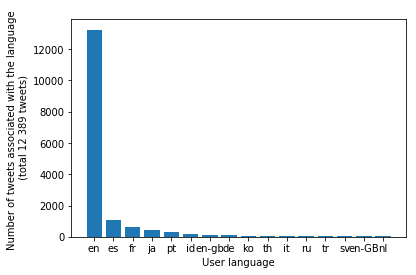

In [20]:

db_name = 'tweets_sentiment_raw.db'
plotTweetByLang(db_name)



In [21]:
all_tweets = getTweetFromDB(db_name, 'en', 7000)

In [22]:
#dir(all_tweets)
# for tweet in all_tweets:
#     print(tweet[0])

In [23]:
all_hashtags = getAllHashtags(all_tweets)
printMostFrequentHashtags(15, all_hashtags)

#wrestlemania
#universalchampion
#universalchampion
#blackpanther
#coco
#coco
#justiceleague
#aquietplace
#readyplayerone
#titanic
#titanic
#titanic
#titanic
#wakanda
#wakanda


In [24]:
all_hashtags

['#Podcast',
 '#Podcas',
 '#iHeartAwards',
 '#Bes',
 '#InfomercialAFilm',
 '#iHeartAwards',
 '#Bes',
 '#deezer',
 '#AQuietPlace',
 '#MBIRadio',
 '#blackpanther',
 '#blackpanther2',
 '#black',
 '#wakanda',
 '#wakandaforever',
 '#hm',
 '#coolest',
 '#ShanghaiDisneyland',
 '#SHDL',
 '#Pixar',
 '#Toy',
 '#NowPlaying',
 '#BlackPanther',
 '#Marvel',
 '#Titanic',
 '#Cinema',
 '#BoxOffice',
 '#BlackPanther',
 '#news',
 '#internet',
 '#TheWalkingDead',
 '#3',
 '#AQuietPlace',
 '#AQuietPlace',
 '#BlackPantherEvent',
 '#BlackPanther',
 '#UniversalChampion',
 '#BigDog',
 '#WrestleMania',
 '#knitting',
 '#BlackPanther',
 '#Ravelry',
 '#ILOVEIT',
 '#1RSIDANCE',
 '#UniversalChampion',
 '#BigDog',
 '#WrestleMania',
 '#UniversalChampion',
 '#BigDog',
 '#WrestleMania',
 '#pets',
 '#birds',
 '#UniversalChampion',
 '#BigDog',
 '#WrestleMania',
 '#UniversalChampion',
 '#BigDog',
 '#WrestleMania',
 '#UniversalChampion',
 '#BigDog',
 '#WrestleMania',
 '#UniversalChampion',
 '#BigDog',
 '#WrestleMania',
 '#Ju

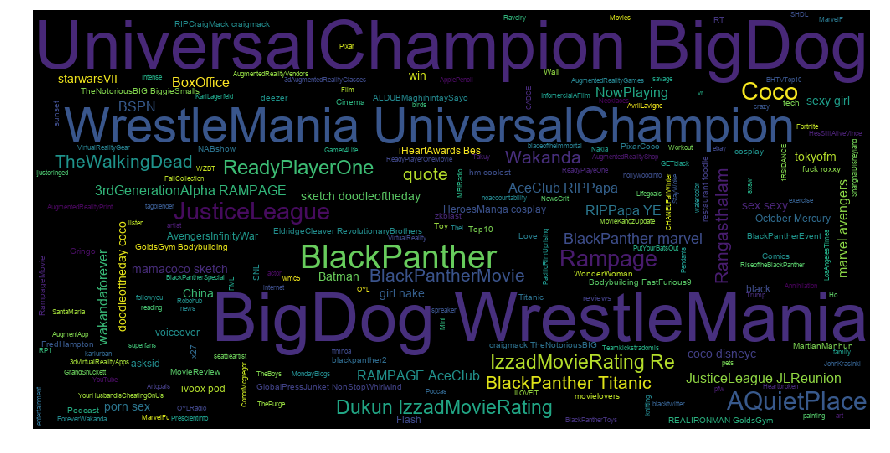

In [25]:

createWordCloud(all_hashtags)